#### Install dependencies

In [1]:
%pip install -U openmim
!mim install mmcv-full

# install mmpose dependencies
%pip install -v -r requirements.txt

%pip install mmdet
%pip install mmpose
# install mmpose in develop mode
%pip install -v -e .
%pip install tables
%run setup_env.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.5/237.5 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
/usr/local/lib/python3.9/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.12.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 8.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 kB 22.7 MB/s eta 0:00:00
Using pip 22.2.2 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)
Ignoring dataclasses: markers 'python_version == "3.6"' don't match your environment
  Cloning https://github.com/svenkreiss/poseval.git to /tmp/pip-install-ri1ykdwl/poseval_3d62edc

In [4]:
%run setup_env.py

In [82]:
test_pose_estimator('work_dirs/res152_acino_256x256',
                    'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                    True)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
=> num_images: 1528
=> load 1510 samples
load checkpoint from local path: work_dirs/res152_acino_256x256_pretr/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1510/1510, 104.3 task/s, elapsed: 14s, ETA:     0s[{'preds': array([[[5.71933441e+01, 6.72966797e+02, 7.00373113e-01],
        [5.51035004e+01, 6.72966797e+02, 6.18414342e-01],
        [5.71933441e+01, 6.79236328e+02, 6.67625785e-01],
        ...,
        [1.88853500e+02, 6.83416016e+02, 7.53693461e-01],
        [1.72134750e+02, 6.83416016e+02, 8.58592033e-01],
        [1.13619125e+02, 6.66697266e+02, 8.94920468e-01]],

       [[2.24196777e+03, 1.02739941e+03, 9.41879332e-01],
        [2.23748535e+03, 1.02739941e+03, 9.54112053e-01],
        [2.24645020e+03, 1.04532910e+03, 9.15443063e-01],
        ...,
        [1.96854004e+03, 1.06325879e+03, 8.30668271e-01],
        [1.95061035e+03, 1.05429395e+03, 8.23398352e-01],
        [2.08956543e+03, 1.00050488e+03

### 2D

#### Extract all AcinoSet 2D Labelled data: COCO format

In [ ]:
# NB: unzip "labelled_data.zip" to "/notebooks/data/acino/labelled" first

acino='/notebooks/data/acino'

img_ids=[os.path.splitext(img)[0] for img in os.listdir(acino+'/../ap10k/data/')]
img_ids.remove('.ipynb_checkpoints')
img_ids=[int(i) for i in img_ids]
img_no=max(img_ids)+1

base=pd.read_csv('base.csv')

for dir in os.listdir(acino+'/labelled'): #JamesFlick1 JamesFlick2 etc.
    print(dir)
    if os.path.isdir(acino+'/labelled/'+dir):
        
        df=pd.read_csv('labelled/'+dir+'/'+"CollectedData_UCT.csv")

        df.iloc[0,1:]=df.iloc[0,1:].astype(str) +'_'+ df.iloc[1,1:].astype(str)
        df.columns=df.iloc[0] # Make keypoint labels column headers
        df=df.iloc[2:,:]
        
        #Extract COCO keypoints (AP10K):
        #df=df.reindex(columns=(['bodyparts','l_eye_x','l_eye_y','r_eye_x','r_eye_y','nose_x','nose_y','neck_base_x','neck_base_y','tail_base_x','tail_base_y','l_shoulder_x','l_shoulder_y','l_front_knee_x','l_front_knee_y','l_front_paw_x','l_front_paw_y','r_shoulder_x','r_shoulder_y','r_front_knee_x','r_front_knee_y','r_front_paw_x','r_front_paw_y','l_hip_x','l_hip_y','l_back_knee_x','l_back_knee_y','l_back_paw_x','l_back_paw_y','r_hip_x','r_hip_y','r_back_knee_x','r_back_knee_y','r_back_paw_x','r_back_paw_y','tail2_x','tail2_y']))
        
        #Extract COCO keypoints (All Acino Keypoints):
        df=df.reindex(columns=(['bodyparts','l_eye_x','l_eye_y','r_eye_x','r_eye_y','nose_x','nose_y','neck_base_x','neck_base_y','tail_base_x','tail_base_y','l_shoulder_x','l_shoulder_y','l_front_knee_x','l_front_knee_y','l_front_paw_x','l_front_paw_y','r_shoulder_x','r_shoulder_y','r_front_knee_x','r_front_knee_y','r_front_paw_x','r_front_paw_y','l_hip_x','l_hip_y','l_back_knee_x','l_back_knee_y','l_back_paw_x','l_back_paw_y','r_hip_x','r_hip_y','r_back_knee_x','r_back_knee_y','r_back_paw_x','r_back_paw_y','tail2_x','tail2_y','tail1_x','tail1_y','r_front_ankle_x','r_front_ankle_y','l_front_ankle_x','l_front_ankle_y','r_back_ankle_x','r_back_ankle_y','l_back_ankle_x','l_back_ankle_y','spine_x','spine_y']))
        
        for i in range(0,len(df)): # Iterate over rows
            orig=df.iloc[i,0].split('/')[2]
            df.iloc[i,0]='as_'+str(img_no)+'.jpg'
            
            im=Image.open('data/acino/labelled/'+dir+'/'+orig)
            img_name='as_'+str(img_no)
            im.save('data/acino/data/'+img_name+'.jpg')
            
            #os.remove('labelled1/'+dir+'/'+orig)
            
            
            img_no+=1
        base=pd.concat([base,df[0:]],ignore_index=True)
               
base.to_csv("data/acino/annotations.csv",index=False)

In [ ]:
df = pd.read_csv('data/acino/annotations.csv')

if os.path.exists("data/acino/annotations/acino_all.json"):
    os.remove("data/acino/annotations/acino_all.json")
    
shutil.copyfile('data/acino/annotations/anns_empty_acino.json','data/acino/annotations/acino_all.json')

with open('data/acino/annotations/acino_all.json','r+') as f: # Save all annotation instances in one .json file
    anns_data=json.load(f)
    
    for i in range(0,len(df)):# Iterate over each image

        #Add image instance
        img_name=df.iloc[i,0]
        img_id=int(img_name[3:].split('.')[0])
        img=cv2.imread('data/acino/data/'+img_name)
        height = img.shape[0]
        width = img.shape[1]
        img_inst=dict(width=width,height=height,file_name=img_name,background=1,id=img_id)
        
        #Add annotation instance
        ann_id=img_id
        kp=[]
        num_kp=0

        # Initial bbox:
        x_min=width-1
        x_max=1
        y_min=height-1
        y_max=1

        for j in range(1,len(df.columns),2): # -12 for AP10k format
            if pd.isnull(df.iloc[i,j]): #NaN values
                kp.append(0)
                kp.append(0)
                kp.append(0)
                
            else:
                x=int(round(pd.to_numeric(df.iloc[i,j])))
                y=int(round(pd.to_numeric(df.iloc[i,j+1])))
                
                #Add annotations
                kp.append(x)
                kp.append(y)
                kp.append(2)
                num_kp+=1

                #Bbox
                if x<x_min:
                    x_min=x
                if x>x_max:
                    x_max=x
                if y>y_max:
                    y_max=y
                if y<y_min:
                    y_min=y
                    
        # Pad bbox with extra pixels:
        x_min=x_min-15
        y_min=y_min-15
        
        # BBox w, h
        w=max(1,(x_max-x_min))+30
        h=max(1,(y_max-y_min))+30
        a=w*h # Bbox area
        
        #Padded bounding box:
        bbox=[x_min,y_min,w,h] # xywh format NB! y_min==top left corner
        
        # Uncomment for AP10k format:
        
#         if kp[-1]==2: # If tip of tail != NaN
#             num_kp-=1 
            
#         del kp[-3:] # Remove tail_x, tail_y, visible
        
        
        ann_inst=dict(image_id=img_id,iscrowd=0,category_id=1,num_keypoints=num_kp,keypoints=kp,bbox=bbox,id=ann_id,area=a)
        anns_data['images'].append(img_inst)
        anns_data['annotations'].append(ann_inst)
    f.seek(0)
    json.dump(anns_data,f,indent=4)
f.close()

In [46]:
# Generating bbox using mmdet
from mmdet.apis import inference_detector, init_detector
from mmpose.apis import process_mmdet_results

det_model = init_detector(
        'MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py', 'MMDet/retinanet_r50_fpn_2x_acino/latest.pth', 'cuda:0')

for set in ['acino_test.json','acino_train.json','acino_val.json']:

    data=mmcv.load(f'data/acino/annotations/{set}')
    print(len(data))
    for img in range(len(data['annotations'])):
        imgid=data['annotations'][img]['image_id'] 
        imgpth=f'data/acino/data/as_{imgid}.jpg'
        mmdet_results = inference_detector(det_model, imgpth)
        mmdet_results=process_mmdet_results(mmdet_results,1)

        if mmdet_results[0]['bbox'][4]<0.7:
            print(imgpth)

        data['annotations'][img]['bbox']=mmdet_results[0]['bbox'][:4].tolist()
    mmcv.dump(data, f'data/acino/annotations/mmdet_{set}')

load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/latest.pth
5
[5.7980530e+02 6.8312988e+02 6.9360620e+02 7.4908911e+02 5.2255124e-01]
[0.0000000e+00 3.9323804e+02 6.3627466e+02 7.1206464e+02 6.1629456e-01]
[0.0000000e+00 1.5015374e+03 1.8789404e+01 1.5200000e+03 1.1375013e-01]
[0.00000000e+00 1.50158765e+03 1.88757324e+01 1.52000000e+03
 1.14435956e-01]
[0.0000000e+00 1.5015425e+03 1.8914368e+01 1.5200000e+03 1.1388724e-01]
[1.9045553e+03 1.0628713e+03 1.9191234e+03 1.0782177e+03 1.2770340e-01]
[1.6592386e+03 4.9824301e+02 1.8985122e+03 7.1812244e+02 2.6603258e-01]
[1.6572927e+03 5.3083191e+02 1.8550112e+03 7.0559973e+02 4.6245801e-01]
[1.74914322e+01 5.43229431e+02 1.18047005e+02 6.14189331e+02
 2.76691109e-01]
[4.8819256e+00 1.0641230e+03 2.0628153e+01 1.0796554e+03 1.1166571e-01]
[7.2086450e+02 5.3817413e+02 8.2415778e+02 5.9300775e+02 5.6946927e-01]
[1.9033893e+03 1.0622781e+03 1.9188724e+03 1.0784863e+03 1.3632821e-01]
[1.9043010e+03 1.0624471e+03 1.9190370e+03 1.

In [37]:
train['annotations'][15]['bbox']

[373.6556701660156, 706.6466674804688, 768.1975708007812, 966.8517456054688]

In [ ]:
%pip install echo1-coco-split

!coco-split --annotations_file data/acino/annotations/acino_all.json --valid_ratio 0.1 --test_ratio 0.2 --train_name data/acino/annotations/acino_train.json --valid_name data/acino/annotations/acino_val.json --test_name data/acino/annotations/acino_test.json --has_annotations

#### Train, test and demo 2D pose estimator

##### Config file:

In [2]:
cfg ='configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res50_acino_256x256.py'
train_2D_cfg(cfg,False)

/notebooks/mmpose/utils/setup_env.py:32: UserWarning: Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
/notebooks/mmpose/utils/setup_env.py:42: UserWarning: Setting MKL_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed.
  warnings.warn(
2022-10-24 05:09:13,498 - mmpose - INFO - Distributed training: False
2022-10-24 05:09:13,502 - mmpose - INFO - Set random seed to 0, deterministic: False


loading annotations into memory...
Done (t=0.27s)
creating index...
index created!
=> num_images: 5346
=> load 5289 samples


2022-10-24 05:09:16,493 - mmpose - INFO - Start running, host: root@nm81iczkr1, work_dir: /notebooks/work_dirs/res50_acino_256x256
2022-10-24 05:09:16,497 - mmpose - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) CheckpointHook 

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
=> num_images: 764
=> load 757 samples


2022-10-24 05:09:53,000 - mmpose - INFO - Epoch [1][5/83]	lr: 7.643e-06, eta: 14:17:07, time: 7.295, data_time: 6.242, memory: 9910, heatmap_loss: 0.0016, acc_pose: 0.0149, loss: 0.0016
2022-10-24 05:09:57,781 - mmpose - INFO - Epoch [1][10/83]	lr: 1.613e-05, eta: 8:04:24, time: 0.956, data_time: 0.368, memory: 9910, heatmap_loss: 0.0016, acc_pose: 0.0132, loss: 0.0016
2022-10-24 05:10:02,346 - mmpose - INFO - Epoch [1][15/83]	lr: 2.463e-05, eta: 5:58:24, time: 0.913, data_time: 0.357, memory: 9910, heatmap_loss: 0.0016, acc_pose: 0.0252, loss: 0.0016
2022-10-24 05:10:07,640 - mmpose - INFO - Epoch [1][20/83]	lr: 3.312e-05, eta: 4:59:38, time: 1.059, data_time: 0.502, memory: 9910, heatmap_loss: 0.0016, acc_pose: 0.0356, loss: 0.0016
2022-10-24 05:10:15,265 - mmpose - INFO - Epoch [1][25/83]	lr: 4.161e-05, eta: 4:35:17, time: 1.525, data_time: 0.964, memory: 9910, heatmap_loss: 0.0015, acc_pose: 0.0377, loss: 0.0015
2022-10-24 05:10:20,656 - mmpose - INFO - Epoch [1][30/83]	lr: 5.010e-

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 5.4 task/s, elapsed: 141s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.007
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.056
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.009
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.008
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.033
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.178
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 05:20:00,311 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_5.pth.
2022-10-24 05:20:00,314 - mmpose - INFO - Best AP is 0.0075 at 5 epoch.
2022-10-24 05:20:00,317 - mmpose - INFO - Epoch(val) [5][24]	AP: 0.0075, AP .5: 0.0557, AP .75: 0.0000, AP (M): 0.0094, AP (L): 0.0079, AR: 0.0329, AR .5: 0.1783, AR .75: 0.0013, AR (M): 0.0264, AR (L): 0.0338
2022-10-24 05:20:11,507 - mmpose - INFO - Epoch [6][5/83]	lr: 7.124e-04, eta: 2:06:20, time: 2.214, data_time: 1.603, memory: 9910, heatmap_loss: 0.0013, acc_pose: 0.3767, loss: 0.0013
2022-10-24 05:20:16,026 - mmpose - INFO - Epoch [6][10/83]	lr: 7.209e-04, eta: 2:05:56, time: 0.904, data_time: 0.311, memory: 9910, heatmap_loss: 0.0013, acc_pose: 0.3908, loss: 0.0013
2022-10-24 05:20:20,538 - mmpose - INFO - Epoch [6][15/83]	lr: 7.294e-04, eta: 2:05:32, time: 0.902, data_time: 0.319, memory: 9910, heatmap_loss: 0.0013, acc_pose: 0.3845, loss: 0.0013
2022-10-24 05:20:25,676 - mmpose - INFO - Epoch [6][20/83]	lr: 7.3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 70.7 task/s, elapsed: 11s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-10-24 05:27:50,113 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_5.pth was removed


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.215
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.706
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.033
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.077
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.233
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.276
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.757
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.136
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.295


2022-10-24 05:27:58,529 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_10.pth.
2022-10-24 05:27:58,534 - mmpose - INFO - Best AP is 0.2151 at 10 epoch.
2022-10-24 05:27:58,545 - mmpose - INFO - Epoch(val) [10][24]	AP: 0.2151, AP .5: 0.7064, AP .75: 0.0327, AP (M): 0.0767, AP (L): 0.2331, AR: 0.2762, AR .5: 0.7569, AR .75: 0.1096, AR (M): 0.1363, AR (L): 0.2953
2022-10-24 05:28:08,929 - mmpose - INFO - Epoch [11][5/83]	lr: 8.500e-04, eta: 1:52:15, time: 2.068, data_time: 1.465, memory: 9910, heatmap_loss: 0.0010, acc_pose: 0.6017, loss: 0.0010
2022-10-24 05:28:13,083 - mmpose - INFO - Epoch [11][10/83]	lr: 8.500e-04, eta: 1:52:00, time: 0.831, data_time: 0.226, memory: 9910, heatmap_loss: 0.0010, acc_pose: 0.6075, loss: 0.0010
2022-10-24 05:28:18,385 - mmpose - INFO - Epoch [11][15/83]	lr: 8.500e-04, eta: 1:51:54, time: 1.060, data_time: 0.451, memory: 9910, heatmap_loss: 0.0010, acc_pose: 0.6354, loss: 0.0010
2022-10-24 05:28:22,691 - mmpose - INFO - Epoch [11][20/83]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 68.1 task/s, elapsed: 11s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.305
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.808
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.119
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.127
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.328
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.360
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.834
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.236
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 05:35:11,654 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_10.pth was removed
2022-10-24 05:35:20,115 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_15.pth.
2022-10-24 05:35:20,120 - mmpose - INFO - Best AP is 0.3051 at 15 epoch.
2022-10-24 05:35:20,122 - mmpose - INFO - Epoch(val) [15][24]	AP: 0.3051, AP .5: 0.8076, AP .75: 0.1187, AP (M): 0.1267, AP (L): 0.3283, AR: 0.3600, AR .5: 0.8336, AR .75: 0.2365, AR (M): 0.1758, AR (L): 0.3851
2022-10-24 05:35:30,676 - mmpose - INFO - Epoch [16][5/83]	lr: 8.500e-04, eta: 1:41:21, time: 2.054, data_time: 1.456, memory: 9910, heatmap_loss: 0.0008, acc_pose: 0.6680, loss: 0.0008
2022-10-24 05:35:35,132 - mmpose - INFO - Epoch [16][10/83]	lr: 8.500e-04, eta: 1:41:13, time: 0.891, data_time: 0.290, memory: 9910, heatmap_loss: 0.0008, acc_pose: 0.6834, loss: 0.0008
2022-10-24 05:35:39,828 - mmpose - INFO - Epoch [16][15/83]	lr: 8.500e-04, eta: 1:41:05, time: 0.939, 

[>>>>>>>>>>>>>>>>>>>>>>>>>    ] 666/757, 64.7 task/s, elapsed: 10s, ETA:     1s

2022-10-24 05:44:17,933 - mmpose - INFO - Epoch [21][80/83]	lr: 8.500e-04, eta: 1:31:12, time: 0.837, data_time: 0.234, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7329, loss: 0.0007
2022-10-24 05:44:31,304 - mmpose - INFO - Epoch [22][5/83]	lr: 8.500e-04, eta: 1:31:09, time: 2.024, data_time: 1.422, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7372, loss: 0.0007
2022-10-24 05:44:35,677 - mmpose - INFO - Epoch [22][10/83]	lr: 8.500e-04, eta: 1:31:02, time: 0.875, data_time: 0.269, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7312, loss: 0.0007
2022-10-24 05:44:39,818 - mmpose - INFO - Epoch [22][15/83]	lr: 8.500e-04, eta: 1:30:54, time: 0.828, data_time: 0.228, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7491, loss: 0.0007
2022-10-24 05:44:44,078 - mmpose - INFO - Epoch [22][20/83]	lr: 8.500e-04, eta: 1:30:46, time: 0.852, data_time: 0.258, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7512, loss: 0.0007
2022-10-24 05:44:50,078 - mmpose - INFO - Epoch [22][25/83]	lr: 8.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 66.8 task/s, elapsed: 11s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.505
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.943
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.507
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.310
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.560
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.951
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.608
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 05:50:19,946 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_20.pth was removed
2022-10-24 05:50:21,920 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_25.pth.
2022-10-24 05:50:21,923 - mmpose - INFO - Best AP is 0.5049 at 25 epoch.
2022-10-24 05:50:21,926 - mmpose - INFO - Epoch(val) [25][24]	AP: 0.5049, AP .5: 0.9429, AP .75: 0.5067, AP (M): 0.3099, AP (L): 0.5282, AR: 0.5602, AR .5: 0.9511, AR .75: 0.6077, AR (M): 0.3857, AR (L): 0.5841
2022-10-24 05:50:32,689 - mmpose - INFO - Epoch [26][5/83]	lr: 8.500e-04, eta: 1:25:06, time: 2.150, data_time: 1.544, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7878, loss: 0.0007
2022-10-24 05:50:37,180 - mmpose - INFO - Epoch [26][10/83]	lr: 8.500e-04, eta: 1:24:59, time: 0.898, data_time: 0.306, memory: 9910, heatmap_loss: 0.0007, acc_pose: 0.7886, loss: 0.0007
2022-10-24 05:50:41,940 - mmpose - INFO - Epoch [26][15/83]	lr: 8.500e-04, eta: 1:24:53, time: 0.952, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 69.2 task/s, elapsed: 11s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-10-24 05:56:48,644 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_25.pth was removed


DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.552
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.955
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.582
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.398
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.571
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.608
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.963
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.466
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.627


2022-10-24 05:56:50,645 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_30.pth.
2022-10-24 05:56:50,657 - mmpose - INFO - Best AP is 0.5522 at 30 epoch.
2022-10-24 05:56:50,662 - mmpose - INFO - Epoch(val) [30][24]	AP: 0.5522, AP .5: 0.9549, AP .75: 0.5818, AP (M): 0.3982, AP (L): 0.5713, AR: 0.6077, AR .5: 0.9630, AR .75: 0.6724, AR (M): 0.4659, AR (L): 0.6270
2022-10-24 05:57:00,065 - mmpose - INFO - Epoch [31][5/83]	lr: 8.500e-04, eta: 1:15:55, time: 1.847, data_time: 1.240, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8105, loss: 0.0006
2022-10-24 05:57:04,260 - mmpose - INFO - Epoch [31][10/83]	lr: 8.500e-04, eta: 1:15:49, time: 0.842, data_time: 0.252, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8046, loss: 0.0006
2022-10-24 05:57:07,784 - mmpose - INFO - Epoch [31][15/83]	lr: 8.500e-04, eta: 1:15:41, time: 0.705, data_time: 0.113, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8156, loss: 0.0006
2022-10-24 05:57:11,364 - mmpose - INFO - Epoch [31][20/83]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 89.2 task/s, elapsed: 8s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...


2022-10-24 06:02:53,109 - mmpose - INFO - Epoch(val) [35][24]	AP: 0.5020, AP .5: 0.9233, AP .75: 0.5098, AP (M): 0.2926, AP (L): 0.5288, AR: 0.5540, AR .5: 0.9313, AR .75: 0.5958, AR (M): 0.3615, AR (L): 0.5803


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.502
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.923
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.510
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.293
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.554
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.931
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.596
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.362
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.580


2022-10-24 06:03:02,541 - mmpose - INFO - Epoch [36][5/83]	lr: 8.500e-04, eta: 1:07:16, time: 1.884, data_time: 1.294, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.7991, loss: 0.0006
2022-10-24 06:03:06,299 - mmpose - INFO - Epoch [36][10/83]	lr: 8.500e-04, eta: 1:07:10, time: 0.752, data_time: 0.160, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8103, loss: 0.0006
2022-10-24 06:03:10,229 - mmpose - INFO - Epoch [36][15/83]	lr: 8.500e-04, eta: 1:07:03, time: 0.786, data_time: 0.188, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8227, loss: 0.0006
2022-10-24 06:03:14,050 - mmpose - INFO - Epoch [36][20/83]	lr: 8.500e-04, eta: 1:06:57, time: 0.764, data_time: 0.165, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8139, loss: 0.0006
2022-10-24 06:03:18,730 - mmpose - INFO - Epoch [36][25/83]	lr: 8.500e-04, eta: 1:06:52, time: 0.936, data_time: 0.328, memory: 9910, heatmap_loss: 0.0006, acc_pose: 0.8145, loss: 0.0006
2022-10-24 06:03:23,397 - mmpose - INFO - Epoch [36][30/83]	lr: 8.

[>>>>>>>>>>>>>>>               ] 403/757, 74.0 task/s, elapsed: 5s, ETA:     5s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

2022-10-24 06:36:10,545 - mmpose - INFO - Epoch [63][50/83]	lr: 8.500e-05, eta: 0:27:59, time: 0.746, data_time: 0.143, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8845, loss: 0.0005
2022-10-24 06:36:14,310 - mmpose - INFO - Epoch [63][55/83]	lr: 8.500e-05, eta: 0:27:54, time: 0.753, data_time: 0.152, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8762, loss: 0.0005
2022-10-24 06:36:17,825 - mmpose - INFO - Epoch [63][60/83]	lr: 8.500e-05, eta: 0:27:49, time: 0.703, data_time: 0.106, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8578, loss: 0.0005
2022-10-24 06:36:21,937 - mmpose - INFO - Epoch [63][65/83]	lr: 8.500e-05, eta: 0:27:44, time: 0.822, data_time: 0.218, m

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 88.6 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...


2022-10-24 06:39:03,565 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_60.pth was removed


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.669
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.968
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.795
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.553
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.717
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.838
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.619
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.730


2022-10-24 06:39:05,453 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_65.pth.
2022-10-24 06:39:05,456 - mmpose - INFO - Best AP is 0.6692 at 65 epoch.
2022-10-24 06:39:05,459 - mmpose - INFO - Epoch(val) [65][24]	AP: 0.6692, AP .5: 0.9676, AP .75: 0.7950, AP (M): 0.5528, AP (L): 0.6840, AR: 0.7166, AR .5: 0.9789, AR .75: 0.8375, AR (M): 0.6187, AR (L): 0.7300
2022-10-24 06:39:14,520 - mmpose - INFO - Epoch [66][5/83]	lr: 8.500e-05, eta: 0:24:49, time: 1.810, data_time: 1.205, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8886, loss: 0.0004
2022-10-24 06:39:18,173 - mmpose - INFO - Epoch [66][10/83]	lr: 8.500e-05, eta: 0:24:44, time: 0.730, data_time: 0.125, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8716, loss: 0.0005
2022-10-24 06:39:21,907 - mmpose - INFO - Epoch [66][15/83]	lr: 8.500e-05, eta: 0:24:39, time: 0.747, data_time: 0.143, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8903, loss: 0.0004
2022-10-24 06:39:25,417 - mmpose - INFO - Epoch [66][20/83]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 86.9 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-10-24 06:45:07,166 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_65.pth was removed


DONE (t=0.45s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.678
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.977
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.806
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.565
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.692
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.722
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.844
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.735


2022-10-24 06:45:09,266 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_70.pth.
2022-10-24 06:45:09,269 - mmpose - INFO - Best AP is 0.6778 at 70 epoch.
2022-10-24 06:45:09,271 - mmpose - INFO - Epoch(val) [70][24]	AP: 0.6778, AP .5: 0.9774, AP .75: 0.8060, AP (M): 0.5645, AP (L): 0.6916, AR: 0.7221, AR .5: 0.9802, AR .75: 0.8441, AR (M): 0.6264, AR (L): 0.7351
2022-10-24 06:45:18,477 - mmpose - INFO - Epoch [71][5/83]	lr: 8.500e-06, eta: 0:18:28, time: 1.817, data_time: 1.225, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8949, loss: 0.0004
2022-10-24 06:45:22,088 - mmpose - INFO - Epoch [71][10/83]	lr: 8.500e-06, eta: 0:18:23, time: 0.722, data_time: 0.121, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8952, loss: 0.0004
2022-10-24 06:45:25,636 - mmpose - INFO - Epoch [71][15/83]	lr: 8.500e-06, eta: 0:18:18, time: 0.710, data_time: 0.107, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8874, loss: 0.0004
2022-10-24 06:45:29,207 - mmpose - INFO - Epoch [71][20/83]	

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 87.2 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.681
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.806
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.562
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.725
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.849
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 06:51:13,686 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_70.pth was removed
2022-10-24 06:51:15,831 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_75.pth.
2022-10-24 06:51:15,834 - mmpose - INFO - Best AP is 0.6810 at 75 epoch.
2022-10-24 06:51:15,843 - mmpose - INFO - Epoch(val) [75][24]	AP: 0.6810, AP .5: 0.9780, AP .75: 0.8057, AP (M): 0.5625, AP (L): 0.6946, AR: 0.7248, AR .5: 0.9802, AR .75: 0.8494, AR (M): 0.6264, AR (L): 0.7383
2022-10-24 06:51:25,057 - mmpose - INFO - Epoch [76][5/83]	lr: 8.500e-06, eta: 0:12:13, time: 1.823, data_time: 1.219, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8652, loss: 0.0005
2022-10-24 06:51:28,921 - mmpose - INFO - Epoch [76][10/83]	lr: 8.500e-06, eta: 0:12:08, time: 0.773, data_time: 0.173, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8858, loss: 0.0004
2022-10-24 06:51:32,632 - mmpose - INFO - Epoch [76][15/83]	lr: 8.500e-06, eta: 0:12:04, time: 0.742, 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 88.0 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.21s).
Accumulating evaluation results...


2022-10-24 06:57:17,881 - mmpose - INFO - Epoch(val) [80][24]	AP: 0.6781, AP .5: 0.9782, AP .75: 0.8051, AP (M): 0.5656, AP (L): 0.6929, AR: 0.7235, AR .5: 0.9802, AR .75: 0.8481, AR (M): 0.6264, AR (L): 0.7368


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.678
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.805
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.566
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.693
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.724
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.848
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.737


2022-10-24 06:57:26,921 - mmpose - INFO - Epoch [81][5/83]	lr: 8.500e-07, eta: 0:06:02, time: 1.806, data_time: 1.206, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8929, loss: 0.0004
2022-10-24 06:57:30,707 - mmpose - INFO - Epoch [81][10/83]	lr: 8.500e-07, eta: 0:05:58, time: 0.757, data_time: 0.152, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8822, loss: 0.0005
2022-10-24 06:57:34,611 - mmpose - INFO - Epoch [81][15/83]	lr: 8.500e-07, eta: 0:05:53, time: 0.781, data_time: 0.177, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8789, loss: 0.0004
2022-10-24 06:57:38,537 - mmpose - INFO - Epoch [81][20/83]	lr: 8.500e-07, eta: 0:05:49, time: 0.785, data_time: 0.183, memory: 9910, heatmap_loss: 0.0004, acc_pose: 0.8968, loss: 0.0004
2022-10-24 06:57:42,544 - mmpose - INFO - Epoch [81][25/83]	lr: 8.500e-07, eta: 0:05:44, time: 0.802, data_time: 0.206, memory: 9910, heatmap_loss: 0.0005, acc_pose: 0.8651, loss: 0.0005
2022-10-24 06:57:46,952 - mmpose - INFO - Epoch [81][30/83]	lr: 8.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 88.7 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...


2022-10-24 07:03:21,168 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/res50_acino_256x256/best_AP_epoch_75.pth was removed


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.681
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.817
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.567
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.726
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.856
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.738


2022-10-24 07:03:23,104 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_85.pth.
2022-10-24 07:03:23,107 - mmpose - INFO - Best AP is 0.6811 at 85 epoch.
2022-10-24 07:03:23,115 - mmpose - INFO - Epoch(val) [85][24]	AP: 0.6811, AP .5: 0.9783, AP .75: 0.8169, AP (M): 0.5668, AP (L): 0.6951, AR: 0.7256, AR .5: 0.9802, AR .75: 0.8560, AR (M): 0.6319, AR (L): 0.7384


In [ ]:
# Config file:
cfg = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/hrnet_w32_acino_256x256.py'
train_2D_cfg(cfg,True)
cfg = 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/hrnet_w32_acino_256x256.py'
train_2D_cfg(cfg,False)

2022-10-24 07:03:24,612 - mmpose - INFO - Distributed training: False
2022-10-24 07:03:24,615 - mmpose - INFO - Set random seed to 0, deterministic: False


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
=> num_images: 5346
=> load 5289 samples
load checkpoint from http path: https://download.openmmlab.com/mmpose/pretrain_models/hrnet_w32-36af842e.pth


Downloading: "https://download.openmmlab.com/mmpose/pretrain_models/hrnet_w32-36af842e.pth" to /root/.cache/torch/hub/checkpoints/hrnet_w32-36af842e.pth


  0%|          | 0.00/126M [00:00<?, ?B/s]

2022-10-24 07:03:42,540 - mmpose - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: head.0.0.0.conv1.weight, head.0.0.0.bn1.weight, head.0.0.0.bn1.bias, head.0.0.0.bn1.running_mean, head.0.0.0.bn1.running_var, head.0.0.0.bn1.num_batches_tracked, head.0.0.0.conv2.weight, head.0.0.0.bn2.weight, head.0.0.0.bn2.bias, head.0.0.0.bn2.running_mean, head.0.0.0.bn2.running_var, head.0.0.0.bn2.num_batches_tracked, head.0.0.0.conv3.weight, head.0.0.0.bn3.weight, head.0.0.0.bn3.bias, head.0.0.0.bn3.running_mean, head.0.0.0.bn3.running_var, head.0.0.0.bn3.num_batches_tracked, head.0.0.0.downsample.0.weight, head.0.0.0.downsample.1.weight, head.0.0.0.downsample.1.bias, head.0.0.0.downsample.1.running_mean, head.0.0.0.downsample.1.running_var, head.0.0.0.downsample.1.num_batches_tracked, head.0.1.0.conv1.weight, head.0.1.0.bn1.weight, head.0.1.0.bn1.bias, head.0.1.0.bn1.running_mean, head.0.1.0.bn1.running_var, head.0.1.0.bn1.num_batches_tracked, he

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
=> num_images: 764
=> load 757 samples


2022-10-24 07:03:53,325 - mmpose - INFO - Epoch [1][5/83]	lr: 7.643e-06, eta: 4:06:43, time: 2.100, data_time: 1.067, memory: 12830, heatmap_loss: 0.0015, acc_pose: 0.0234, loss: 0.0015
2022-10-24 07:03:58,355 - mmpose - INFO - Epoch [1][10/83]	lr: 1.613e-05, eta: 3:02:20, time: 1.006, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0281, loss: 0.0016
2022-10-24 07:04:03,452 - mmpose - INFO - Epoch [1][15/83]	lr: 2.463e-05, eta: 2:41:20, time: 1.020, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0378, loss: 0.0016
2022-10-24 07:04:08,457 - mmpose - INFO - Epoch [1][20/83]	lr: 3.312e-05, eta: 2:30:15, time: 1.001, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0491, loss: 0.0016
2022-10-24 07:04:13,506 - mmpose - INFO - Epoch [1][25/83]	lr: 4.161e-05, eta: 2:23:47, time: 1.010, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0751, loss: 0.0016
2022-10-24 07:04:18,534 - mmpose - INFO - Epoch [1][30/83]	lr: 5.0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 84.7 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.43s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.449
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.958
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.306
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.330
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.465
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.509
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.962
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.464
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 07:11:19,958 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_5.pth.
2022-10-24 07:11:19,962 - mmpose - INFO - Best AP is 0.4495 at 5 epoch.
2022-10-24 07:11:19,964 - mmpose - INFO - Epoch(val) [5][24]	AP: 0.4495, AP .5: 0.9577, AP .75: 0.3057, AP (M): 0.3304, AP (L): 0.4653, AR: 0.5094, AR .5: 0.9617, AR .75: 0.4637, AR (M): 0.4088, AR (L): 0.5231
2022-10-24 07:11:30,607 - mmpose - INFO - Epoch [6][5/83]	lr: 7.124e-04, eta: 1:56:27, time: 2.126, data_time: 1.111, memory: 12830, heatmap_loss: 0.0007, acc_pose: 0.7333, loss: 0.0007
2022-10-24 07:11:35,654 - mmpose - INFO - Epoch [6][10/83]	lr: 7.209e-04, eta: 1:56:18, time: 1.009, data_time: 0.002, memory: 12830, heatmap_loss: 0.0007, acc_pose: 0.7388, loss: 0.0007
2022-10-24 07:11:40,708 - mmpose - INFO - Epoch [6][15/83]	lr: 7.294e-04, eta: 1:56:10, time: 1.011, data_time: 0.002, memory: 12830, heatmap_loss: 0.0007, acc_pose: 0.7581, loss: 0.0007
2022-10-24 07:11:45,771 - mmpose - INFO - Epoch [6][20/83]	lr: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 84.2 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.576
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.969
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.633
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.412
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.596
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.627
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.713
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 07:18:58,785 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_5.pth was removed
2022-10-24 07:19:00,700 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_10.pth.
2022-10-24 07:19:00,709 - mmpose - INFO - Best AP is 0.5756 at 10 epoch.
2022-10-24 07:19:00,711 - mmpose - INFO - Epoch(val) [10][24]	AP: 0.5756, AP .5: 0.9693, AP .75: 0.6335, AP (M): 0.4116, AP (L): 0.5959, AR: 0.6268, AR .5: 0.9789, AR .75: 0.7133, AR (M): 0.4890, AR (L): 0.6456
2022-10-24 07:19:11,017 - mmpose - INFO - Epoch [11][5/83]	lr: 8.500e-04, eta: 1:48:34, time: 2.057, data_time: 1.045, memory: 12830, heatmap_loss: 0.0006, acc_pose: 0.7924, loss: 0.0006
2022-10-24 07:19:16,095 - mmpose - INFO - Epoch [11][10/83]	lr: 8.500e-04, eta: 1:48:28, time: 1.016, data_time: 0.002, memory: 12830, heatmap_loss: 0.0006, acc_pose: 0.7766, loss: 0.0006
2022-10-24 07:19:21,124 - mmpose - INFO - Epoch [11][15/83]	lr: 8.500e-04, eta: 1:48:21, ti

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 82.3 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.21s).
Accumulating evaluation results...


2022-10-24 07:26:37,519 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_10.pth was removed


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.632
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.967
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.738
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.480
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.683
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.793
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.551
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.701


2022-10-24 07:26:39,341 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_15.pth.
2022-10-24 07:26:39,345 - mmpose - INFO - Best AP is 0.6318 at 15 epoch.
2022-10-24 07:26:39,347 - mmpose - INFO - Epoch(val) [15][24]	AP: 0.6318, AP .5: 0.9669, AP .75: 0.7381, AP (M): 0.4803, AP (L): 0.6503, AR: 0.6831, AR .5: 0.9789, AR .75: 0.7926, AR (M): 0.5505, AR (L): 0.7012
2022-10-24 07:26:49,819 - mmpose - INFO - Epoch [16][5/83]	lr: 8.500e-04, eta: 1:41:12, time: 2.091, data_time: 1.071, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8560, loss: 0.0005
2022-10-24 07:26:54,925 - mmpose - INFO - Epoch [16][10/83]	lr: 8.500e-04, eta: 1:41:06, time: 1.021, data_time: 0.003, memory: 12830, heatmap_loss: 0.0006, acc_pose: 0.8331, loss: 0.0006
2022-10-24 07:26:59,973 - mmpose - INFO - Epoch [16][15/83]	lr: 8.500e-04, eta: 1:41:00, time: 1.010, data_time: 0.002, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8349, loss: 0.0005
2022-10-24 07:27:05,063 - mmpose - INFO - Epoch [16][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.5 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...


2022-10-24 07:34:17,217 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_15.pth was removed


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.650
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.760
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.503
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.699
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.983
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.585
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.715


2022-10-24 07:34:18,987 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_20.pth.
2022-10-24 07:34:18,990 - mmpose - INFO - Best AP is 0.6504 at 20 epoch.
2022-10-24 07:34:18,992 - mmpose - INFO - Epoch(val) [20][24]	AP: 0.6504, AP .5: 0.9784, AP .75: 0.7598, AP (M): 0.5032, AP (L): 0.6688, AR: 0.6993, AR .5: 0.9828, AR .75: 0.8085, AR (M): 0.5846, AR (L): 0.7150
2022-10-24 07:34:29,449 - mmpose - INFO - Epoch [21][5/83]	lr: 8.500e-04, eta: 1:33:53, time: 2.089, data_time: 1.068, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8700, loss: 0.0005
2022-10-24 07:34:34,576 - mmpose - INFO - Epoch [21][10/83]	lr: 8.500e-04, eta: 1:33:47, time: 1.025, data_time: 0.002, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8657, loss: 0.0005
2022-10-24 07:34:39,600 - mmpose - INFO - Epoch [21][15/83]	lr: 8.500e-04, eta: 1:33:41, time: 1.005, data_time: 0.002, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8499, loss: 0.0005
2022-10-24 07:34:44,623 - mmpose - INFO - Epoch [21][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.2 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.676
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.776
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.515
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.722
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.984
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.828
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 07:41:55,125 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_20.pth was removed
2022-10-24 07:41:56,934 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_25.pth.
2022-10-24 07:41:56,938 - mmpose - INFO - Best AP is 0.6762 at 25 epoch.
2022-10-24 07:41:56,940 - mmpose - INFO - Epoch(val) [25][24]	AP: 0.6762, AP .5: 0.9784, AP .75: 0.7762, AP (M): 0.5155, AP (L): 0.6954, AR: 0.7215, AR .5: 0.9841, AR .75: 0.8283, AR (M): 0.5956, AR (L): 0.7387
2022-10-24 07:42:07,732 - mmpose - INFO - Epoch [26][5/83]	lr: 8.500e-04, eta: 1:26:36, time: 2.156, data_time: 1.132, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8689, loss: 0.0005
2022-10-24 07:42:12,810 - mmpose - INFO - Epoch [26][10/83]	lr: 8.500e-04, eta: 1:26:31, time: 1.016, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8706, loss: 0.0004
2022-10-24 07:42:17,868 - mmpose - INFO - Epoch [26][15/83]	lr: 8.500e-04, eta: 1:26:25, t

[>>>>>>>>>>>>>>>>>>>>>         ] 545/757, 75.2 task/s, elapsed: 7s, ETA:     3s

2022-10-24 07:51:07,687 - mmpose - INFO - Epoch [31][80/83]	lr: 8.500e-04, eta: 1:18:01, time: 1.005, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8912, loss: 0.0004
2022-10-24 07:51:20,868 - mmpose - INFO - Epoch [32][5/83]	lr: 8.500e-04, eta: 1:17:56, time: 2.072, data_time: 1.048, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8738, loss: 0.0004
2022-10-24 07:51:25,953 - mmpose - INFO - Epoch [32][10/83]	lr: 8.500e-04, eta: 1:17:51, time: 1.017, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8830, loss: 0.0004
2022-10-24 07:51:31,039 - mmpose - INFO - Epoch [32][15/83]	lr: 8.500e-04, eta: 1:17:45, time: 1.017, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8847, loss: 0.0004
2022-10-24 07:51:36,096 - mmpose - INFO - Epoch [32][20/83]	lr: 8.500e-04, eta: 1:17:40, time: 1.011, data_time: 0.002, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8684, loss: 0.0005
2022-10-24 07:51:41,148 - mmpose - INFO - Epoch [32][25/83]	l

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.0 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.691
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.816
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.522
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.711
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.737
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.983
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.857
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 07:57:18,083 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_30.pth was removed
2022-10-24 07:57:20,085 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_35.pth.
2022-10-24 07:57:20,089 - mmpose - INFO - Best AP is 0.6909 at 35 epoch.
2022-10-24 07:57:20,091 - mmpose - INFO - Epoch(val) [35][24]	AP: 0.6909, AP .5: 0.9787, AP .75: 0.8155, AP (M): 0.5218, AP (L): 0.7112, AR: 0.7371, AR .5: 0.9828, AR .75: 0.8573, AR (M): 0.5989, AR (L): 0.7560
2022-10-24 07:57:30,584 - mmpose - INFO - Epoch [36][5/83]	lr: 8.500e-04, eta: 1:12:07, time: 2.096, data_time: 1.080, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8731, loss: 0.0004
2022-10-24 07:57:35,624 - mmpose - INFO - Epoch [36][10/83]	lr: 8.500e-04, eta: 1:12:02, time: 1.008, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8751, loss: 0.0004
2022-10-24 07:57:40,708 - mmpose - INFO - Epoch [36][15/83]	lr: 8.500e-04, eta: 1:11:56, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 81.5 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.22s).
Accumulating evaluation results...


2022-10-24 08:04:58,640 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_35.pth was removed


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.705
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.826
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.564
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.720
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.747
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.987
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.861
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.762


2022-10-24 08:05:00,596 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_40.pth.
2022-10-24 08:05:00,599 - mmpose - INFO - Best AP is 0.7051 at 40 epoch.
2022-10-24 08:05:00,602 - mmpose - INFO - Epoch(val) [40][24]	AP: 0.7051, AP .5: 0.9792, AP .75: 0.8262, AP (M): 0.5636, AP (L): 0.7201, AR: 0.7468, AR .5: 0.9868, AR .75: 0.8613, AR (M): 0.6319, AR (L): 0.7625
2022-10-24 08:05:11,060 - mmpose - INFO - Epoch [41][5/83]	lr: 8.500e-04, eta: 1:04:53, time: 2.090, data_time: 1.057, memory: 12830, heatmap_loss: 0.0005, acc_pose: 0.8623, loss: 0.0005
2022-10-24 08:05:16,143 - mmpose - INFO - Epoch [41][10/83]	lr: 8.500e-04, eta: 1:04:48, time: 1.015, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8857, loss: 0.0004
2022-10-24 08:05:21,201 - mmpose - INFO - Epoch [41][15/83]	lr: 8.500e-04, eta: 1:04:42, time: 1.013, data_time: 0.003, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8951, loss: 0.0004
2022-10-24 08:05:26,224 - mmpose - INFO - Epoch [41][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.6 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-10-24 08:12:37,069 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_40.pth was removed


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.716
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.858
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.588
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.730
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.756
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.988
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.882
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.770


2022-10-24 08:12:38,920 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_45.pth.
2022-10-24 08:12:38,924 - mmpose - INFO - Best AP is 0.7157 at 45 epoch.
2022-10-24 08:12:38,927 - mmpose - INFO - Epoch(val) [45][24]	AP: 0.7157, AP .5: 0.9797, AP .75: 0.8581, AP (M): 0.5882, AP (L): 0.7303, AR: 0.7561, AR .5: 0.9881, AR .75: 0.8824, AR (M): 0.6538, AR (L): 0.7701
2022-10-24 08:12:49,533 - mmpose - INFO - Epoch [46][5/83]	lr: 8.500e-04, eta: 0:57:40, time: 2.119, data_time: 1.097, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8944, loss: 0.0004
2022-10-24 08:12:54,595 - mmpose - INFO - Epoch [46][10/83]	lr: 8.500e-04, eta: 0:57:34, time: 1.012, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8916, loss: 0.0004
2022-10-24 08:12:59,748 - mmpose - INFO - Epoch [46][15/83]	lr: 8.500e-04, eta: 0:57:29, time: 1.031, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8994, loss: 0.0004
2022-10-24 08:13:04,816 - mmpose - INFO - Epoch [46][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 84.5 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.719
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.847
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.551
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.761
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.985
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.876
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 08:20:18,263 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_45.pth was removed
2022-10-24 08:20:20,067 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_50.pth.
2022-10-24 08:20:20,070 - mmpose - INFO - Best AP is 0.7191 at 50 epoch.
2022-10-24 08:20:20,073 - mmpose - INFO - Epoch(val) [50][24]	AP: 0.7191, AP .5: 0.9790, AP .75: 0.8474, AP (M): 0.5512, AP (L): 0.7400, AR: 0.7606, AR .5: 0.9855, AR .75: 0.8758, AR (M): 0.6242, AR (L): 0.7793
2022-10-24 08:20:30,662 - mmpose - INFO - Epoch [51][5/83]	lr: 8.500e-04, eta: 0:50:27, time: 2.116, data_time: 1.095, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8869, loss: 0.0004
2022-10-24 08:20:35,740 - mmpose - INFO - Epoch [51][10/83]	lr: 8.500e-04, eta: 0:50:21, time: 1.016, data_time: 0.017, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8892, loss: 0.0004
2022-10-24 08:20:40,831 - mmpose - INFO - Epoch [51][15/83]	lr: 8.500e-04, eta: 0:50:16, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.0 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.719
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.978
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.857
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.564
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.736
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.983
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.884
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 08:27:57,776 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_50.pth was removed
2022-10-24 08:27:59,567 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_55.pth.
2022-10-24 08:27:59,570 - mmpose - INFO - Best AP is 0.7194 at 55 epoch.
2022-10-24 08:27:59,572 - mmpose - INFO - Epoch(val) [55][24]	AP: 0.7194, AP .5: 0.9783, AP .75: 0.8568, AP (M): 0.5641, AP (L): 0.7363, AR: 0.7602, AR .5: 0.9828, AR .75: 0.8838, AR (M): 0.6363, AR (L): 0.7772
2022-10-24 08:28:10,192 - mmpose - INFO - Epoch [56][5/83]	lr: 8.500e-04, eta: 0:43:14, time: 2.122, data_time: 1.080, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8986, loss: 0.0004
2022-10-24 08:28:15,344 - mmpose - INFO - Epoch [56][10/83]	lr: 8.500e-04, eta: 0:43:08, time: 1.030, data_time: 0.018, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8945, loss: 0.0004
2022-10-24 08:28:20,419 - mmpose - INFO - Epoch [56][15/83]	lr: 8.500e-04, eta: 0:43:03, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.4 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*


2022-10-24 08:35:38,367 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_55.pth was removed


DONE (t=0.43s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.720
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.979
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.856
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.566
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.738
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.761
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.881
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.778


2022-10-24 08:35:40,073 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_60.pth.
2022-10-24 08:35:40,078 - mmpose - INFO - Best AP is 0.7198 at 60 epoch.
2022-10-24 08:35:40,080 - mmpose - INFO - Epoch(val) [60][24]	AP: 0.7198, AP .5: 0.9792, AP .75: 0.8560, AP (M): 0.5663, AP (L): 0.7384, AR: 0.7613, AR .5: 0.9894, AR .75: 0.8811, AR (M): 0.6396, AR (L): 0.7779
2022-10-24 08:35:50,675 - mmpose - INFO - Epoch [61][5/83]	lr: 8.500e-05, eta: 0:36:00, time: 2.116, data_time: 1.092, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8978, loss: 0.0004
2022-10-24 08:35:55,751 - mmpose - INFO - Epoch [61][10/83]	lr: 8.500e-05, eta: 0:35:55, time: 1.015, data_time: 0.003, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.8997, loss: 0.0004
2022-10-24 08:36:00,771 - mmpose - INFO - Epoch [61][15/83]	lr: 8.500e-05, eta: 0:35:50, time: 1.004, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.9052, loss: 0.0004
2022-10-24 08:36:05,837 - mmpose - INFO - Epoch [61][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 84.2 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...


2022-10-24 08:43:16,688 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_60.pth was removed


DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.736
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.870
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.586
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.755
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.777
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.893
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.665
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.793


2022-10-24 08:43:18,529 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_65.pth.
2022-10-24 08:43:18,533 - mmpose - INFO - Best AP is 0.7364 at 65 epoch.
2022-10-24 08:43:18,536 - mmpose - INFO - Epoch(val) [65][24]	AP: 0.7364, AP .5: 0.9795, AP .75: 0.8697, AP (M): 0.5857, AP (L): 0.7548, AR: 0.7773, AR .5: 0.9894, AR .75: 0.8930, AR (M): 0.6648, AR (L): 0.7926
2022-10-24 08:43:29,108 - mmpose - INFO - Epoch [66][5/83]	lr: 8.500e-05, eta: 0:28:47, time: 2.111, data_time: 1.095, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.9092, loss: 0.0004
2022-10-24 08:43:34,154 - mmpose - INFO - Epoch [66][10/83]	lr: 8.500e-05, eta: 0:28:42, time: 1.009, data_time: 0.002, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9130, loss: 0.0003
2022-10-24 08:43:39,213 - mmpose - INFO - Epoch [66][15/83]	lr: 8.500e-05, eta: 0:28:36, time: 1.012, data_time: 0.003, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9191, loss: 0.0003
2022-10-24 08:43:44,224 - mmpose - INFO - Epoch [66][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 82.1 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.737
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.873
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.577
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.757
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.779
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.988
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.898
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 08:50:58,349 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_65.pth was removed
2022-10-24 08:51:00,142 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_70.pth.
2022-10-24 08:51:00,165 - mmpose - INFO - Best AP is 0.7375 at 70 epoch.
2022-10-24 08:51:00,173 - mmpose - INFO - Epoch(val) [70][24]	AP: 0.7375, AP .5: 0.9795, AP .75: 0.8725, AP (M): 0.5770, AP (L): 0.7570, AR: 0.7791, AR .5: 0.9881, AR .75: 0.8983, AR (M): 0.6593, AR (L): 0.7955
2022-10-24 08:51:10,968 - mmpose - INFO - Epoch [71][5/83]	lr: 8.500e-06, eta: 0:21:34, time: 2.157, data_time: 1.141, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.9150, loss: 0.0004
2022-10-24 08:51:16,137 - mmpose - INFO - Epoch [71][10/83]	lr: 8.500e-06, eta: 0:21:29, time: 1.034, data_time: 0.032, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9249, loss: 0.0003
2022-10-24 08:51:21,241 - mmpose - INFO - Epoch [71][15/83]	lr: 8.500e-06, eta: 0:21:23, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 84.8 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.739
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.980
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.862
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.573
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.758
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.780
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.989
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.889
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 08:58:38,040 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_70.pth was removed
2022-10-24 08:58:40,114 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_75.pth.
2022-10-24 08:58:40,118 - mmpose - INFO - Best AP is 0.7392 at 75 epoch.
2022-10-24 08:58:40,121 - mmpose - INFO - Epoch(val) [75][24]	AP: 0.7392, AP .5: 0.9797, AP .75: 0.8624, AP (M): 0.5735, AP (L): 0.7584, AR: 0.7799, AR .5: 0.9894, AR .75: 0.8890, AR (M): 0.6571, AR (L): 0.7967
2022-10-24 08:58:51,055 - mmpose - INFO - Epoch [76][5/83]	lr: 8.500e-06, eta: 0:14:21, time: 2.185, data_time: 1.157, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9105, loss: 0.0003
2022-10-24 08:58:56,120 - mmpose - INFO - Epoch [76][10/83]	lr: 8.500e-06, eta: 0:14:15, time: 1.013, data_time: 0.002, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.9197, loss: 0.0004
2022-10-24 08:59:01,208 - mmpose - INFO - Epoch [76][15/83]	lr: 8.500e-06, eta: 0:14:10, t

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 82.5 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.23s).
Accumulating evaluation results...


2022-10-24 09:06:21,212 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_75.pth was removed


DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.740
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.873
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.579
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.781
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.991
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.893
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.660
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.797


2022-10-24 09:06:23,086 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_80.pth.
2022-10-24 09:06:23,089 - mmpose - INFO - Best AP is 0.7402 at 80 epoch.
2022-10-24 09:06:23,093 - mmpose - INFO - Epoch(val) [80][24]	AP: 0.7402, AP .5: 0.9896, AP .75: 0.8729, AP (M): 0.5794, AP (L): 0.7596, AR: 0.7806, AR .5: 0.9908, AR .75: 0.8930, AR (M): 0.6604, AR (L): 0.7970
2022-10-24 09:06:33,661 - mmpose - INFO - Epoch [81][5/83]	lr: 8.500e-07, eta: 0:07:07, time: 2.112, data_time: 1.097, memory: 12830, heatmap_loss: 0.0004, acc_pose: 0.9027, loss: 0.0004
2022-10-24 09:06:38,673 - mmpose - INFO - Epoch [81][10/83]	lr: 8.500e-07, eta: 0:07:02, time: 1.003, data_time: 0.002, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9174, loss: 0.0003
2022-10-24 09:06:43,754 - mmpose - INFO - Epoch [81][15/83]	lr: 8.500e-07, eta: 0:06:57, time: 1.016, data_time: 0.003, memory: 12830, heatmap_loss: 0.0003, acc_pose: 0.9195, loss: 0.0003
2022-10-24 09:06:48,833 - mmpose - INFO - Epoch [81][20/8

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 85.1 task/s, elapsed: 9s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.743
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.990
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.872
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.578
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.760
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.782
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.991
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.892
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 09:14:03,896 - mmpose - INFO - The previous best checkpoint /notebooks/work_dirs/hrnet_w32_acino_256x256_pretr/best_AP_epoch_80.pth was removed
2022-10-24 09:14:05,599 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_85.pth.
2022-10-24 09:14:05,602 - mmpose - INFO - Best AP is 0.7428 at 85 epoch.
2022-10-24 09:14:05,610 - mmpose - INFO - Epoch(val) [85][24]	AP: 0.7428, AP .5: 0.9896, AP .75: 0.8723, AP (M): 0.5779, AP (L): 0.7602, AR: 0.7818, AR .5: 0.9908, AR .75: 0.8917, AR (M): 0.6604, AR (L): 0.7983
2022-10-24 09:14:06,967 - mmpose - INFO - Distributed training: False
2022-10-24 09:14:06,975 - mmpose - INFO - Set random seed to 0, deterministic: False


loading annotations into memory...
Done (t=0.07s)
creating index...
index created!
=> num_images: 5346
=> load 5289 samples
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


2022-10-24 09:14:08,110 - mmpose - INFO - Start running, host: root@nm81iczkr1, work_dir: /notebooks/work_dirs/hrnet_w32_acino_256x256
2022-10-24 09:14:08,113 - mmpose - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
 -------------------- 
after_train_iter:
(ABOVE_NORMAL) OptimizerHook                      
(NORMAL      ) CheckpointH

=> num_images: 764
=> load 757 samples


2022-10-24 09:14:18,450 - mmpose - INFO - Epoch [1][5/83]	lr: 7.643e-06, eta: 4:02:27, time: 2.064, data_time: 1.038, memory: 12830, heatmap_loss: 0.0025, acc_pose: 0.0148, loss: 0.0025
2022-10-24 09:14:23,488 - mmpose - INFO - Epoch [1][10/83]	lr: 1.613e-05, eta: 3:00:19, time: 1.008, data_time: 0.003, memory: 12830, heatmap_loss: 0.0020, acc_pose: 0.0106, loss: 0.0020
2022-10-24 09:14:28,566 - mmpose - INFO - Epoch [1][15/83]	lr: 2.463e-05, eta: 2:39:51, time: 1.016, data_time: 0.005, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0126, loss: 0.0016
2022-10-24 09:14:33,639 - mmpose - INFO - Epoch [1][20/83]	lr: 3.312e-05, eta: 2:29:32, time: 1.015, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0242, loss: 0.0016
2022-10-24 09:14:38,691 - mmpose - INFO - Epoch [1][25/83]	lr: 4.161e-05, eta: 2:23:13, time: 1.010, data_time: 0.002, memory: 12830, heatmap_loss: 0.0016, acc_pose: 0.0433, loss: 0.0016
2022-10-24 09:14:43,740 - mmpose - INFO - Epoch [1][30/83]	lr: 5.0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 757/757, 75.0 task/s, elapsed: 10s, ETA:     0sLoading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.055
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.271
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] =  0.023
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] =  0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] =  0.103
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] =  0.408
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] =  0.011
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium 

2022-10-24 09:21:45,868 - mmpose - INFO - Now best checkpoint is saved as best_AP_epoch_5.pth.
2022-10-24 09:21:45,872 - mmpose - INFO - Best AP is 0.0548 at 5 epoch.
2022-10-24 09:21:45,874 - mmpose - INFO - Epoch(val) [5][24]	AP: 0.0548, AP .5: 0.2706, AP .75: 0.0012, AP (M): 0.0226, AP (L): 0.0595, AR: 0.1025, AR .5: 0.4082, AR .75: 0.0106, AR (M): 0.0593, AR (L): 0.1084
2022-10-24 09:21:56,586 - mmpose - INFO - Epoch [6][5/83]	lr: 7.124e-04, eta: 1:56:20, time: 2.119, data_time: 1.095, memory: 12830, heatmap_loss: 0.0012, acc_pose: 0.4588, loss: 0.0012
2022-10-24 09:22:01,614 - mmpose - INFO - Epoch [6][10/83]	lr: 7.209e-04, eta: 1:56:11, time: 1.006, data_time: 0.002, memory: 12830, heatmap_loss: 0.0012, acc_pose: 0.4821, loss: 0.0012
2022-10-24 09:22:06,693 - mmpose - INFO - Epoch [6][15/83]	lr: 7.294e-04, eta: 1:56:03, time: 1.016, data_time: 0.002, memory: 12830, heatmap_loss: 0.0012, acc_pose: 0.5066, loss: 0.0012
2022-10-24 09:22:11,736 - mmpose - INFO - Epoch [6][20/83]	lr: 

[>>>>>>>>>>>>>>>               ] 394/757, 50.6 task/s, elapsed: 8s, ETA:     7s

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

2022-10-24 09:33:25,824 - mmpose - INFO - Epoch [13][45/83]	lr: 8.500e-04, eta: 1:45:13, time: 1.011, data_time: 0.003, memory: 12830, heatmap_loss: 0.0008, acc_pose: 0.6631, loss: 0.0008
2022-10-24 09:33:30,884 - mmpose - INFO - Epoch [13][50/83]	lr: 8.500e-04, eta: 1:45:06, time: 1.012, data_time: 0.002, memory: 12830, heatmap_loss: 0.0008, acc_pose: 0.6977, loss: 0.0008
2022-10-24 09:33:35,959 - mmpose - INFO - Epoch [13][55/83]	lr: 8.500e-04, eta: 1:45:00, time: 1.015, data_time: 0.002, memory: 12830, heatmap_loss: 0.0008, acc_pose: 0.6838, loss: 0.0008
2022-10-24 09:33:41,032 - mmpose - INFO - Epoch [13][60/83]	lr: 8.500e-04, eta: 1:44:54, time: 1.015, data_time: 0.003

In [12]:
train=np.load('data/acino_3d/annotations/FTE/acino3d_train.npz')
len

##### Train model from cfg: 

##### 2D Estimator inference, analysis:

In [ ]:
# Test model:

pose_checkpoint = cfg.work_dir+'/latest.pth'
json_file_gt='data/acino/annotations/acino_all.json'

# with open('./work_dirs/hrnet_w32_acino-10k_256x256_epoch50/result_keypoints.json','r') as f: 
#     json_file_pred=json.load(f)
# f.close()

# print()

coco = COCO(json_file_gt)
# print(coco)
img_keys = list(coco.imgs.keys())
# print(img_keys)
# # initialize pose model
pose_model = init_pose_model(cfg, pose_checkpoint)
dataset = pose_model.cfg.data.test.type
dataset_info = pose_model.cfg.data.test.get('dataset_info', None)
dataset_info = DatasetInfo(dataset_info)
return_heatmap=True
output_layer_names=None

n=1 # Num imgs to plot
ntest=len(img_keys)
show= np.random.choice(ntest,n)

#GT:
for i in range(n):
    img_id=img_keys[show[i]]
    image=coco.loadImgs(img_id)[0]
    img_name=os.path.join('data/acino/data',image['file_name'])
    
    # pred=next(inst for inst in json_file_pred if inst['image_id']==img_id)
        
    ann_ids=coco.getAnnIds(img_id)
    # print(ann_ids)
    ann=coco.anns[ann_ids[0]]
    # print(ann)
    animal_bbox=[]
    gt_keypoints=[]
    
    for ann_id in ann_ids:
        animal={}  
        ann=coco.anns[ann_id]
        animal['bbox']=ann['bbox']
        animal_bbox.append(animal)
        
        gt={}
        x=ann['bbox'][0]
        y=ann['bbox'][1]
        w=ann['bbox'][2]
        h=ann['bbox'][3]
        gt['bbox']=[x,y,x+w,y+h]
        gt['keypoints']=np.array(ann['keypoints']).reshape(24,3)
        gt_keypoints.append(gt)
    
    # x=ann['bbox'][0]
    # y=ann['bbox'][1]
    # w=ann['bbox'][2]
    # h=ann['bbox'][3]
#     print(ann['bbox'])
    # bbox=[x,y,x+w,y+h]
    
#     print(ann['bbox'])

    pose_results, returned_outputs = inference_top_down_pose_model(
        pose_model,
        img_name,
        person_results=animal_bbox, # BBoxs required for top down
        bbox_thr=None,
        format='xywh',
        dataset=dataset,
        dataset_info=dataset_info,
        return_heatmap=True, #for now
        outputs=output_layer_names)
    
    out_file_pred = os.path.join('vis_result', f'vis_as{img_id}.jpg')
    out_file_gt = os.path.join('vis_result', f'vis_gt_as{img_id}.jpg')
    vis_result_pred=vis_pose_result(pose_model,img_name,pose_results,radius=3,thickness=1,out_file=out_file_pred)
    # vis_result_pred = cv2.resize(vis_result_pred, dsize=None, fx=1.5, fy=1.5)
    
    vis_result_gt=vis_pose_result(pose_model,img_name,gt_keypoints,radius=3,thickness=1,out_file=out_file_gt)
    # vis_result_gt = cv2.resize(vis_result_gt, dsize=None, fx=1.5, fy=1.5)
    # vis_result_gt = vis_result_gt

    plt.figure(figsize=(15,10))
    plt.imshow(vis_result_gt[y-25:y+h+25,x-25:x+w+25])
    plt.show()
    
    plt.figure(figsize=(15,10))
    plt.imshow(vis_result_pred[y-25:y+h+50,x-25:x+w+50])
    plt.show()
    
#     os.makedirs('vis_result', exist_ok=True)
#     out_file = os.path.join('vis_result', f'vis_as{image_id}.jpg')
#     vis_result=vis_pose_result(pose_model,image_name,pose_results,radius=3,thickness=1,out_file=out_file)
#     vis_result = cv2.resize(vis_result, dsize=None, fx=1.5, fy=1.5)
#     # plt.figure(figsize=(15,10))
#     # plt.imshow(vis_result)
#     # plt.show()
    


In [ ]:
!python tools/analysis/analyze_logs.py \
        plot_curve work_dirs/hrnet_w32_acino_256x256_epoch50/None.log.json \
        --keys acc_pose \
        --legend Accuracy \
        --out acino_accuracy.jpg

##### 2D Estimator demo with MMDet

In [45]:
det_config='MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py'
det_checkpoint='MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth'

pose_config='configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py'
pose_checkpoint='work_dirs/res152_acino_256x256_pretr/epoch_80.pth'

vid='vis_results/lily39cam2.mp4'#'../storage/cam3.mp4'
# out_vid='vis_results'

In [ ]:
%run setup_env.py
det_config='MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py'
det_checkpoint='MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth'

pose_config='configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py'
pose_checkpoint='work_dirs/res152_acino_256x256_pretr/epoch_80.pth'

vid='vis_results/lily39cam2.mp4'
topdown_mmtrack(det_config,det_checkpoint,pose_config,pose_checkpoint,vid)

### 3D

#### Extract all AcinoSet 3D data

In [137]:
# kp2d_res[:,:,2:]
x=np.load('data/acino_3d/annotations/Res50/acino3d_train.npz')
np.reshape(x['part'][:,:,2:],(20,10975))[:,0]


array([0.92301565, 0.87193483, 0.91597664, 0.93954647, 0.87893677,
       0.55683208, 0.89322901, 1.        , 0.81639624, 0.00404445,
       0.91083425, 0.29521003, 0.        , 0.20737392, 0.79919231,
       0.9138338 , 0.71784186, 0.74440837, 0.88070983, 0.89076483])

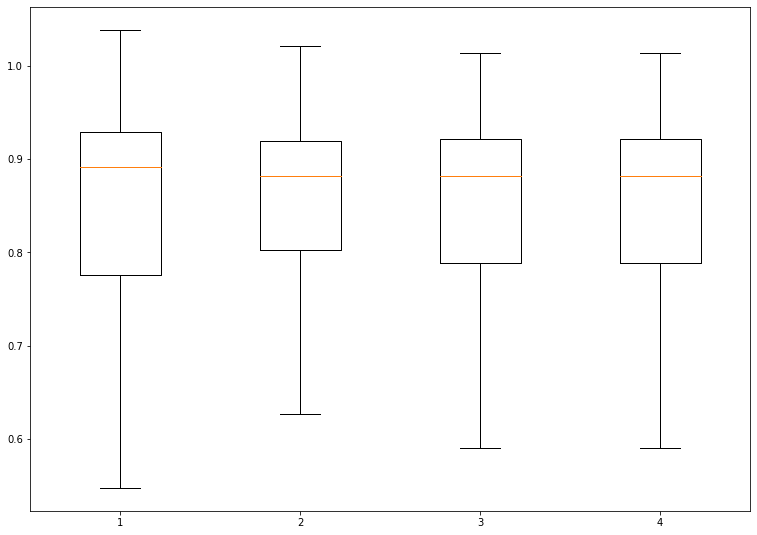

In [146]:
nose=x['part'][:,:,2:][:,0].flatten()
reye=x['part'][:,:,2:][:,1].flatten()
leye=x['part'][:,:,2:][:,2].flatten()
neck=x['part'][:,:,2:][:,3].flatten()
spine=x['part'][:,:,2:][:,4].flatten()
tail_root=x['part'][:,:,2:][:,5].flatten()
tail_mid=x['part'][:,:,2:][:,6].flatten()
tail_tip=x['part'][:,:,2:][:,7].flatten()
r_shoulder=x['part'][:,:,2:][:,8].flatten()
r_f_knee=x['part'][:,:,2:][:,9].flatten()
r_f_ankle=x['part'][:,:,2:][:,10].flatten()
l_shoulder=x['part'][:,:,2:][:,11].flatten()
l_f_knee=x['part'][:,:,2:][:,12].flatten()
l_f_ankle=x['part'][:,:,2:][:,13].flatten()
r_hip=x['part'][:,:,2:][:,14].flatten()
r_b_knee=x['part'][:,:,2:][:,15].flatten()
r_b_ankle=x['part'][:,:,2:][:,16].flatten()
l_hip=x['part'][:,:,2:][:,17].flatten()
l_b_knee=x['part'][:,:,2:][:,18].flatten()
l_b_ankle=x['part'][:,:,2:][:,19].flatten()


fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot([nose,reye,leye,neck,spine,tail_root,tail_mid,tail_tip,r_shoulder,],showfliers=False)
 
# show plot
plt.savefig('pls.png')

In [138]:
x['part'][:,:,2:][

array([[[0.92301565],
        [0.84420121],
        [0.89163518],
        ...,
        [0.07884105],
        [0.17977941],
        [0.01440887]],

       [[0.94347513],
        [0.81407607],
        [0.86851323],
        ...,
        [0.67418993],
        [0.4587321 ],
        [0.01955197]],

       [[0.94558746],
        [0.83171815],
        [0.89047617],
        ...,
        [0.79611719],
        [0.57446015],
        [0.08767438]],

       ...,

       [[0.94113564],
        [0.88042891],
        [0.9425686 ],
        ...,
        [0.85478264],
        [0.87018901],
        [0.91807115]],

       [[0.93210304],
        [0.86157119],
        [0.90656149],
        ...,
        [0.83160573],
        [0.87984538],
        [0.92381102]],

       [[0.94161129],
        [0.87771332],
        [0.9161979 ],
        ...,
        [0.87718976],
        [0.88311553],
        [0.89931089]]])

In [59]:
det_config='MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py'
det_checkpoint='MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth'

pose_config='configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py'
pose_checkpoint='work_dirs/res152_acino_256x256_pretr/epoch_80.pth'

det_model=init_detector(det_config,
                        det_checkpoint)

pose_model=init_pose_model(pose_config,
                           pose_checkpoint)
pose_dataset=pose_model.cfg.data['test']['type']
pose_dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
pose_dataset_info=DatasetInfo(pose_dataset_info)
smoother = Smoother(filter_cfg='configs/_base_/filters/one_euro.py', keypoint_dim=2)
imgnames,centers_res,scales_res,kp2d_res,kp3d,centers_fte,scales_fte,kp2d_fte=get_anns('2019030502','jules','run','cam2.mp4','2019_03_05',57,176,pose_model,det_model,smoother)

load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth
load checkpoint from local path: work_dirs/res152_acino_256x256_pretr/epoch_80.pth
[>>>>>>                         ] 57/261, 80.6 task/s, elapsed: 1s, ETA:     3s

/usr/local/lib/python3.9/dist-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 261/261, 3.5 task/s, elapsed: 74s, ETA:     0s


##### Extract and process 2D and 3D annotations

In [5]:
#Cameras
cameras={}
for date in os.listdir('data/acino_3d'):
    if date.split('_')[0]=='2019':
        #Cameras
        if osp.exists(f'data/acino_3d/{date}/extrinsic_calib/6_cam_scene.json'):
            calib=f'data/acino_3d/{date}/extrinsic_calib/6_cam_scene.json'
            n=6 # cam scene
            add_cameras(n,calib,cameras)

out_file='data/acino_3d/annotations/cameras.pkl'
with open(out_file, 'wb') as fout:
    pickle.dump(cameras, fout)
print(f'Camera parameters have been written to "{out_file}".\n')

Camera parameters have been written to "data/acino_3d/annotations/cameras.pkl".



In [7]:
det_model=init_detector('MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py',
                        'MMDet/retinanet_r50_fpn_2x_acino/latest.pth')

pose_model=init_pose_model('configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                       'work_dirs/res152_acino_256x256_pretr/latest.pth')

pose_dataset=pose_model.cfg.data['test']['type']
pose_dataset_info = pose_model.cfg.data['test'].get('dataset_info', None)
pose_dataset_info=DatasetInfo(pose_dataset_info)
smoother = Smoother(filter_cfg='configs/_base_/filters/one_euro.py', keypoint_dim=2)
    
imgnames_all_train=[]
kps3d_all_train=[]
centers_all_train_fte=[]
scales_all_train_fte=[]
kps2d_all_train_fte=[]
centers_all_train_res=[]
scales_all_train_res=[]
kps2d_all_train_res=[]

imgnames_all_val=[]
kps3d_all_val=[]
centers_all_val_fte=[]
scales_all_val_fte=[]
kps2d_all_val_fte=[]
centers_all_val_res=[]
scales_all_val_res=[]
kps2d_all_val_res=[]

imgnames_all_test=[]
kps3d_all_test=[]
centers_all_test_fte=[]
scales_all_test_fte=[]
kps2d_all_test_fte=[]
centers_all_test_res=[]
scales_all_test_res=[]
kps2d_all_test_res=[]

test_count=0
train_count=0
val_count=0

mode='train'

for date in os.listdir('data/acino_3d'):
    
    if date.split('_')[0]=='2019':
        
        #Images
        if not osp.exists(f'data/acino_3d/{date}/processed.txt'):
            for cheetah in os.listdir(f'data/acino_3d/{date}'):
                if cheetah != 'extrinsic_calib':
                    # mmcv.mkdir_or_exist(f'{cheetah}')

                    for action in os.listdir(f'data/acino_3d/{date}/{cheetah}'):
                        if action== '.ipynb_checkpoints':
                            continue
                        reconstr_params=mmcv.load(f'data/acino_3d/{date}/{cheetah}/{action}/fte_pw/reconstruction_params.json')
                        start_frame=reconstr_params['start_frame']
                        end_frame=reconstr_params['end_frame']

                        for cam in os.listdir(f'data/acino_3d/{date}/{cheetah}/{action}'):
                            
                            if cam.endswith('.mp4'):

                                cam_name=cam.split('.')[0]
                                cam_id=date.replace('_','')+'0'+cam_name[-1]
                                
                                imgnames,centers_res,scales_res,kp2d_res,kp3d,centers_fte,scales_fte,kp2d_fte = get_anns(cam_id, 
                                                                                                                               cheetah, 
                                                                                                                               action, cam, 
                                                                                                                               date, start_frame, 
                                                                                                                               end_frame,
                                                                                                                               pose_model,
                                                                                                                                 pose_dataset,
                                                                                                                         pose_dataset_info,
                                                                                                                               det_model,
                                                                                                                                smoother)
                                if mode=='train':
                                    imgnames_all_train.append(imgnames)
                                    kps3d_all_train.append(kp3d)
                                    
                                    centers_all_train_res.append(centers_res)
                                    scales_all_train_res.append(scales_res)
                                    kps2d_all_train_res.append(kp2d_res)
                                    
                                    centers_all_train_fte.append(centers_fte)
                                    scales_all_train_fte.append(scales_fte)
                                    kps2d_all_train_fte.append(kp2d_fte)
                                    
                                    print(f'{date}, {mode}, {cheetah}, {action}, {cam}. Train: {train_count}')
                                    train_count+=1
                                    if train_count%6==0:
                                        mode='val'
                                
                                elif mode=='val':
                                    imgnames_all_val.append(imgnames)
                                    kps3d_all_val.append(kp3d)
                                    
                                    centers_all_val_res.append(centers_res)
                                    scales_all_val_res.append(scales_res)
                                    kps2d_all_val_res.append(kp2d_res)
                                    
                                    centers_all_val_fte.append(centers_fte)
                                    scales_all_val_fte.append(scales_fte)
                                    kps2d_all_val_fte.append(kp2d_fte)
                                    
                                    val_count+=1
                                    print(f'{date}, {mode}, {cheetah}, {action}, {cam}. Val: {val_count}')
                                    mode='test'
                                    continue
                                    
                                elif mode=='test':
                                    imgnames_all_test.append(imgnames)
                                    kps3d_all_test.append(kp3d)
                                    
                                    centers_all_test_res.append(centers_res)
                                    scales_all_test_res.append(scales_res)
                                    kps2d_all_test_res.append(kp2d_res)
                                    
                                    centers_all_test_fte.append(centers_fte)
                                    scales_all_test_fte.append(scales_fte)
                                    kps2d_all_test_fte.append(kp2d_fte)
                                    
                                    test_count+=1
                                    print(f'{date}, {mode}, {cheetah}, {action}, {cam}. Test: {test_count}')
                                    
                                    if test_count%2==0:
                                        mode='train'
                                        continue
                                    
            # with open(f'data/acino_3d/{date}/processed.txt','w') as processed:
            #     processed.write(f'{date} processed')

imgnames_all_train = np.concatenate(imgnames_all_train)
kps3d_all_train = np.concatenate(kps3d_all_train)

centers_all_train_res = np.concatenate(centers_all_train_res)
scales_all_train_res = np.concatenate(scales_all_train_res)
kps2d_all_train_res = np.concatenate(kps2d_all_train_res)

centers_all_train_fte = np.concatenate(centers_all_train_fte)
scales_all_train_fte = np.concatenate(scales_all_train_fte)
kps2d_all_train_fte = np.concatenate(kps2d_all_train_fte)

np.savez(file=f'data/acino_3d/annotations/FTE/acino3d_train.npz',imgname=imgnames_all_train,center=centers_all_train_fte,scale=scales_all_train_fte,part=kps2d_all_train_fte,S=kps3d_all_train)
np.savez(file=f'data/acino_3d/annotations/Res152/acino3d_train.npz',imgname=imgnames_all_train,center=centers_all_train_res,scale=scales_all_train_res,part=kps2d_all_train_res,S=kps3d_all_train)
print(f"Saved: train")

generate_stats(kps2d_all_train_res,kps3d_all_train,'Res50')
generate_stats(kps2d_all_train_fte,kps3d_all_train,'FTE')

imgnames_all_val = np.concatenate(imgnames_all_val)
kps3d_all_val = np.concatenate(kps3d_all_val)

centers_all_val_res = np.concatenate(centers_all_val_res)
scales_all_val_res = np.concatenate(scales_all_val_res)
kps2d_all_val_res = np.concatenate(kps2d_all_val_res)

centers_all_val_fte = np.concatenate(centers_all_val_fte)
scales_all_val_fte = np.concatenate(scales_all_val_fte)
kps2d_all_val_fte = np.concatenate(kps2d_all_val_fte)

np.savez(file=f'data/acino_3d/annotations/FTE/acino3d_val.npz',imgname=imgnames_all_val,center=centers_all_val_fte,scale=scales_all_val_fte,part=kps2d_all_val_fte,S=kps3d_all_val)
np.savez(file=f'data/acino_3d/annotations/Res152/acino3d_val.npz',imgname=imgnames_all_val,center=centers_all_val_res,scale=scales_all_val_res,part=kps2d_all_val_res,S=kps3d_all_val)
print(f"Saved: val")

imgnames_all_test = np.concatenate(imgnames_all_test)
kps3d_all_test = np.concatenate(kps3d_all_test)

centers_all_test_fte = np.concatenate(centers_all_test_fte)
scales_all_test_fte = np.concatenate(scales_all_test_fte)
kps2d_all_test_fte = np.concatenate(kps2d_all_test_fte)

centers_all_test_res = np.concatenate(centers_all_test_res)
scales_all_test_res = np.concatenate(scales_all_test_res)
kps2d_all_test_res = np.concatenate(kps2d_all_test_res)


np.savez(file=f'data/acino_3d/annotations/FTE/acino3d_test.npz',imgname=imgnames_all_test,center=centers_all_test_fte,scale=scales_all_test_fte,part=kps2d_all_test_fte,S=kps3d_all_test)
np.savez(file=f'data/acino_3d/annotations/Res152/acino3d_test.npz',imgname=imgnames_all_test,center=centers_all_test_res,scale=scales_all_test_res,part=kps2d_all_test_res,S=kps3d_all_test)

print(f"Saved test")

load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/latest.pth
load checkpoint from local path: work_dirs/res152_acino_256x256_pretr/latest.pth
[>>>>>>                         ] 58/261, 66.8 task/s, elapsed: 1s, ETA:     3s

/usr/local/lib/python3.9/dist-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 261/261, 5.2 task/s, elapsed: 51s, ETA:     0s
2019_03_05, train, jules, run, cam6.mp4. Train: 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 261/261, 5.5 task/s, elapsed: 47s, ETA:     0s
2019_03_05, train, jules, run, cam2.mp4. Train: 1
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 261/261, 5.6 task/s, elapsed: 46s, ETA:     0s
2019_03_05, train, jules, run, cam1.mp4. Train: 2
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 261/261, 5.5 task/s, elapsed: 47s, ETA:     0s
2019_03_05, train, jules, run, cam3.mp4. Train: 3
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 271/271, 3.4 task/s, elapsed: 80s, ETA:     0s
2019_03_05, train, jules, flick, cam6.mp4. Train: 4
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 271/271, 3.4 task/s, elapsed: 81s, ETA:     0s
2019_03_05, train, jules, flick, cam2.mp4. Train: 5
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 271/271, 3.5 task/s, elapsed: 77s, ETA:     0s
2019_03_05, val, jules, flick, cam1.mp4. Val: 1
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 271/271, 3.6 task/s, elapsed: 76s, ETA:     0s
2019_03_

#### Train PoseLifter model:

##### PoseLifter with FTE 2D, 3D data

In [ ]:
train_test_lifter('configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_9frames_fullconv_supervised.py',600,'FTE',False,9)
train_test_lifter('configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py',600,'FTE',False,27)

2022-10-18 19:46:13,205 - mmpose - INFO - Distributed training: False
2022-10-18 19:46:13,210 - mmpose - INFO - Set random seed to 0, deterministic: False
2022-10-18 19:46:15,471 - mmpose - INFO - Start running, host: root@nmzahohj5g, work_dir: /notebooks/work_dirs/acino_poselift_FTE_noncausal_9frames
2022-10-18 19:46:15,476 - mmpose - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) ExpLrUpdaterHook                   
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) ExpLrUpdaterHook                   
(NORMAL      ) EvalHook                           
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
 -------------------- 
before_train_iter:
(VERY_HIGH   ) ExpLrUpdaterHook                   
(NORMAL      ) EvalHook                           
(

[>>>>>>>>>>>>>>>>>>>>>>>>>>] 1713/1713, 1581.7 task/s, elapsed: 1s, ETA:     0s

2022-10-18 19:47:02,749 - mmpose - INFO - Now best checkpoint is saved as best_MPJPE_epoch_10.pth.
2022-10-18 19:47:02,752 - mmpose - INFO - Best MPJPE is 0.3995 at 10 epoch.
2022-10-18 19:47:02,756 - mmpose - INFO - Epoch(val) [10][14]	MPJPE: 0.39953020215034485, MPJPE_flick: 0.36696749925613403, MPJPE_run: 0.4431694746017456, P-MPJPE: 0.2522, P-MPJPE_flick: 0.36696749925613403, P-MPJPE_run: 0.4431694746017456, 3DPCK: 15.2860
2022-10-18 19:47:05,407 - mmpose - INFO - Epoch [11][20/86]	lr: 7.755e-03, eta: 0:43:00, time: 0.132, data_time: 0.108, memory: 101, reg_loss: 0.3933, mpjpe: 0.3933, p_mpjpe: 0.2305, loss: 0.3933
2022-10-18 19:47:05,916 - mmpose - INFO - Epoch [11][40/86]	lr: 7.932e-03, eta: 0:42:30, time: 0.026, data_time: 0.001, memory: 101, reg_loss: 0.3844, mpjpe: 0.3844, p_mpjpe: 0.2306, loss: 0.3844
2022-10-18 19:47:06,382 - mmpose - INFO - Epoch [11][60/86]	lr: 8.108e-03, eta: 0:41:59, time: 0.023, data_time: 0.001, memory: 101, reg_loss: 0.3852, mpjpe: 0.3852, p_mpjpe: 0.

In [17]:
test_ckpt(cfg,f'{cfg.work_dir}/latest.pth')

load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 3402/3402, 1440.2 task/s, elapsed: 2s, ETA:     0s
writing results to work_dirs/acino_poselift_Res50_noncausal_supervised/test_results.json
3DPCK: 59.216636419296265
MPJPE: 0.2305927574634552
MPJPE_flick: 0.1898818463087082
MPJPE_run: 0.2809993028640747
P-MPJPE: 0.10259932730092741
P-MPJPE_flick: 0.1898818463087082
P-MPJPE_run: 0.2809993028640747


In [28]:
test_poselifter('configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_res_27frames_fullconv_supervised.py',
                'work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth')


load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>] 3402/3402, 1122.2 task/s, elapsed: 3s, ETA:     0s
writing results to work_dirs/acino_res_poselift_27frames_epoch400/test_results.json
MPJPE: 0.24190257489681244
MPJPE_flick: 0.20780886709690094
MPJPE_run: 0.2841159999370575
P-MPJPE: 0.10666931320482967
P-MPJPE_flick: 0.20780886709690094
P-MPJPE_run: 0.2841159999370575


##### PoseLifter with top-down estimated 2D data, FTE 3D data

In [1]:
%run setup_env.py

In [2]:
%run setup_env.py
cam1=demo_pose_lifter('MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py',
                 'MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth',
                 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                 'work_dirs/res152_acino_256x256/latest.pth',
                 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py',
                 'work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth',
                 'data/acino_3d/2019_03_05/lily/run/cam1.mp4')#'data/acino_3d/2019_03_07/menya/run/cam2.mp4')
cam2=demo_pose_lifter('MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py',
                 'MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth',
                 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                 'work_dirs/res152_acino_256x256/latest.pth',
                 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py',
                 'work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth',
                 'data/acino_3d/2019_03_05/lily/run/cam2.mp4')
cam3=demo_pose_lifter('MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py',
                 'MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth',
                 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                 'work_dirs/res152_acino_256x256/latest.pth',
                 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py',
                 'work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth',
                 'data/acino_3d/2019_03_05/lily/run/cam3.mp4')
cam4=demo_pose_lifter('MMDet/retinanet_r50_fpn_2x_acino/retinanet_r50_fpn_2x_acino.py',
                 'MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth',
                 'configs/animal/2d_kpt_sview_rgb_img/topdown_heatmap/acino/res152_acino_256x256.py',
                 'work_dirs/res152_acino_256x256/latest.pth',
                 'configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py',
                 'work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth',
                 'data/acino_3d/2019_03_05/lily/run/cam4.mp4')

load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth
load checkpoint from local path: work_dirs/res152_acino_256x256/latest.pth
load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth

2D Detection and Pose Estimation:
[                                                  ] 0/360, elapsed: 0s, ETA:

/usr/local/lib/python3.9/dist-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 360/360, 9.4 task/s, elapsed: 38s, ETA:     0s

Pose Lifting:
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 360/360, 13.8 task/s, elapsed: 26s, ETA:     0s
load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth
load checkpoint from local path: work_dirs/res152_acino_256x256/latest.pth
load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth

2D Detection and Pose Estimation:
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 360/360, 10.8 task/s, elapsed: 33s, ETA:     0s

Pose Lifting:
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 360/360, 14.8 task/s, elapsed: 24s, ETA:     0s
load checkpoint from local path: MMDet/retinanet_r50_fpn_2x_acino/epoch_10.pth
load checkpoint from local path: work_dirs/res152_acino_256x256/latest.pth
load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth

2D Detection and Pose Estimation:
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 360/360, 10.8 task/s, elapsed: 33s, ETA:  

In [5]:
assert cam1.shape[0]==cam3.shape[0]

In [18]:
# assert cam1.shape[0]==cam3.shape[0]#==cam3.shape[0]==cam6.shape[0]
vis_frames=[]
for frame in range(cam1.shape[0]):

    for kpt in range(20):
        if cam1[frame][kpt][3] and cam2[frame][kpt][3]!=0 and cam3[frame][kpt][3]!=0 and cam4[frame][kpt][3]!=0:
            all_kpts_vis=True
        else:
            all_kpts_vis=False
    if all_kpts_vis:        
        vis_frames.append(frame)
            
    # if vis_kpts[str(frame)]==[]:
    #     del vis_kpts[str(frame)]
            
vis_frames

[109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 272]

#### Visualise pose-lift

In [28]:
from mmpose.core import imshow_bboxes, imshow_keypoints, imshow_keypoints_3d
from mmpose.apis import vis_3d_pose_result

poselift_cfg='configs/body/3d_kpt_sview_rgb_vid/video_pose_lift/h36m/poselift_acino_27frames_fullconv_supervised.py'
poselift_ckpt='work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth'
video='data/acino_3d/2019_03_07/menya/run/cam2.mp4'

poselift_model=init_pose_model(poselift_cfg,poselift_ckpt)
poselift_dataset = poselift_model.cfg.data['test']['type']
poselift_dataset_info = poselift_model.cfg.data['test'].get('dataset_info', None)
poselift_dataset_info = DatasetInfo(poselift_dataset_info)
skeleton = poselift_dataset_info.skeleton
pose_kpt_color = poselift_dataset_info.pose_kpt_color
pose_link_color = poselift_dataset_info.pose_link_color

# vis_3d_pose_result(
#             poselift_model,
#             result=cam1[120],
#             img=None,#i
#             dataset=poselift_dataset,
#             dataset_info=poselift_dataset_info,
#             out_file='pls.jpg',
#             num_instances=1,
#             show=False)

# vis1=imshow_keypoints_3d([{'keypoints_3d':cam2[120]}],skeleton=None,pose_kpt_color=pose_kpt_color,
#                    pose_link_color=pose_link_color)

vis2=imshow_keypoints_3d([{'keypoints_3d':cam1[170],'title':'Cam1'},
                          {'keypoints_3d':cam2[190],'title':'Cam2'},
                         {'keypoints_3d':cam3[200],'title':'Cam3'},
                         {'keypoints_3d':cam4[230],'title':'Cam4'}],
                         skeleton=skeleton,pose_kpt_color=pose_kpt_color,
                           pose_link_color=pose_link_color,axis_azimuth=50)

# mmcv.imwrite(vis1,'pls1.jpg')
mmcv.imwrite(vis2,'pls2.jpg')
# cam1[120]

# vis2=vis2.flatten()
# for i in range(len(vis1)):
#     if vis1[i]!=vis2[i]:
        # print('No')

load checkpoint from local path: work_dirs/acino_poselift_Res50_noncausal_supervised/epoch_600.pth


True

#### Pose lift variations/std. dev

In [115]:
all_vars=[]
for frame in vis_frames:
    kpt_vars=[]
    for kpt in range(20):
        cams=np.array([cam1[frame][kpt][:3],cam6[frame][kpt][:3],cam3[frame][kpt][:3],cam2[frame][kpt][:3]])

        centroid=np.mean(cams,axis=0)

        tot=0
        for i in range(len(cams)):
            tot+= (centroid[0]-cams[i][0])**2 + (centroid[1]-cams[i][1])**2 + (centroid[2]-cams[i][2])**2

        var=tot/len(cams)
        kpt_vars.append(var)
    kpt_vars=np.array(kpt_vars)
    # print(kpt_vars.shape)
    all_vars=np.append(all_vars,kpt_vars,axis=0)
all_vars.reshape(len(vis_frames),20)

In [118]:
all_vars.reshape(len(vis_frames),20)[0+15]

array([1.93446963e-04, 3.48856087e-04, 1.79635880e-04, 4.86072172e-05,
       5.66439626e-07, 6.98279618e-05, 7.84621614e-04, 3.08604239e-03,
       7.92559324e-05, 2.34986270e-04, 4.14107888e-04, 8.48453373e-05,
       3.07379319e-04, 9.68525230e-04, 4.59318422e-05, 3.76767591e-04,
       7.88811476e-04, 6.60908064e-05, 4.11303958e-04, 4.89853427e-04])

In [117]:
kpt_vars=[]
for kpt in range(20):
    cams=np.array([cam1[56+15][kpt][:3],cam6[56+15][kpt][:3],cam3[56+15][kpt][:3],cam2[56+15][kpt][:3]])

    centroid=np.mean(cams,axis=0)

    tot=0
    for i in range(len(cams)):
        tot+= (centroid[0]-cams[i][0])**2 + (centroid[1]-cams[i][1])**2 + (centroid[2]-cams[i][2])**2

    var=tot/len(cams)
    kpt_vars.append(var)
kpt_vars

[0.0001934469630695372,
 0.00034885608725327474,
 0.00017963588010934048,
 4.860721724608136e-05,
 5.664396256770661e-07,
 6.98279618109492e-05,
 0.000784621613957869,
 0.003086042392155444,
 7.925593236494596e-05,
 0.0002349862700950639,
 0.00041410788846505883,
 8.484533728661536e-05,
 0.00030737931938798013,
 0.0009685252298152298,
 4.5931842231058256e-05,
 0.000376767591012267,
 0.000788811475788187,
 6.609080638885975e-05,
 0.00041130395811000975,
 0.0004898534269218158]

In [113]:
all_vars.reshape(len(vis_frames),20)[0]

array([7.42220660e-04, 5.87634048e-04, 9.29083386e-04, 2.71401535e-04,
       4.17865155e-07, 1.40485761e-04, 1.59949375e-03, 7.15008524e-03,
       4.47817591e-04, 9.67785002e-04, 4.86479753e-03, 4.45415001e-04,
       1.09197471e-03, 2.93152641e-03, 8.88755402e-05, 6.28580123e-03,
       7.10322984e-03, 5.41603571e-05, 1.54819042e-02, 2.01955572e-02])

In [ ]:
import pandas as pd
filename = "julesflick2_cam3_0309.h5"

df=pd.read_hdf(filename)
# df.iloc[0,1:]=df.iloc[0,1:].astype(str) +'_'+ df.iloc[1,1:].astype(str)
# df.columns=df.iloc[0] # Make keypoint labels column headers

# df.columns
#Extract COCO keypoints (AP10K):
# df=df.reindex(columns=(['l_eye','r_eye'])) #'l_eye_y','r_eye_x','r_eye_y','nose_x','nose_y','neck_base_x','neck_base_y','tail_base_x','tail_base_y','l_shoulder_x','l_shoulder_y','l_front_knee_x','l_front_knee_y','l_front_paw_x','l_front_paw_y','r_shoulder_x','r_shoulder_y','r_front_knee_x','r_front_knee_y','r_front_paw_x','r_front_paw_y','l_hip_x','l_hip_y','l_back_knee_x','l_back_knee_y','l_back_paw_x','l_back_paw_y','r_hip_x','r_hip_y','r_back_knee_x','r_back_knee_y','r_back_paw_x','r_back_paw_y','tail2_x','tail2_y']))
# df
#Extract COCO keypoints (All Acino Keypoints):
# # df=df.reindex(columns=(['bodyparts','l_eye_x','l_eye_y','r_eye_x','r_eye_y','nose_x','nose_y','neck_base_x','neck_base_y','tail_base_x','tail_base_y','l_shoulder_x','l_shoulder_y','l_front_knee_x','l_front_knee_y','l_front_paw_x','l_front_paw_y','r_shoulder_x','r_shoulder_y','r_front_knee_x','r_front_knee_y','r_front_paw_x','r_front_paw_y','l_hip_x','l_hip_y','l_back_knee_x','l_back_knee_y','l_back_paw_x','l_back_paw_y','r_hip_x','r_hip_y','r_back_knee_x','r_back_knee_y','r_back_paw_x','r_back_paw_y','tail2_x','tail2_y','tail1_x','tail1_y','r_front_ankle_x','r_front_ankle_y','l_front_ankle_x','l_front_ankle_y','r_back_ankle_x','r_back_ankle_y','l_back_ankle_x','l_back_ankle_y','spine_x','spine_y']))
df=df.reindex(columns=([('UCT',         'l_eye', 'x'),
            ('UCT',         'l_eye', 'y'),('UCT',         'r_eye', 'x'),
            ('UCT',         'r_eye', 'y'),('UCT',          'nose', 'x'),
            ('UCT',          'nose', 'y'),('UCT',     'neck_base', 'x'),
            ('UCT',     'neck_base', 'y'),('UCT',     'tail_base', 'x'),
            ('UCT',     'tail_base', 'y'),('UCT',    'l_shoulder', 'x'),
            ('UCT',    'l_shoulder', 'y'),
            ('UCT',  'l_front_knee', 'x'),
            ('UCT',  'l_front_knee', 'y'),
            ('UCT',   'l_front_paw', 'x'),
            ('UCT',   'l_front_paw', 'y'),
            ('UCT',    'r_shoulder', 'x'),
            ('UCT',    'r_shoulder', 'y'),
            ('UCT',  'r_front_knee', 'x'),
            ('UCT',  'r_front_knee', 'y'),
            ('UCT',   'r_front_paw', 'x'),
            ('UCT',   'r_front_paw', 'y'),('UCT',         'l_hip', 'x'),
            ('UCT',         'l_hip', 'y'),
            ('UCT',   'l_back_knee', 'x'),
            ('UCT',   'l_back_knee', 'y'),
            ('UCT',    'l_back_paw', 'x'),
            ('UCT',    'l_back_paw', 'y'),('UCT',         'r_hip', 'x'),
            ('UCT',         'r_hip', 'y'),
            ('UCT',   'r_back_knee', 'x'),
            ('UCT',   'r_back_knee', 'y'),
            ('UCT',    'r_back_paw', 'x'),
            ('UCT',    'r_back_paw', 'y'),('UCT',         'tail2', 'x'),
            ('UCT',         'tail2', 'y'),('UCT',         'tail1', 'x'),
            ('UCT',         'tail1', 'y'),('UCT', 'r_front_ankle', 'x'),
            ('UCT', 'r_front_ankle', 'y'),('UCT', 'l_front_ankle', 'x'),
            ('UCT', 'l_front_ankle', 'y'),('UCT',  'r_back_ankle', 'x'),
            ('UCT',  'r_back_ankle', 'y'),('UCT',  'l_back_ankle', 'x'),
            ('UCT',  'l_back_ankle', 'y'),('UCT',         'spine', 'x'),
            ('UCT',         'spine', 'y')]))
df

In [5]:
val=np.load('data/acino_3d/annotations/Res152/acino3d_val.npz')
test=np.load('data/acino_3d/annotations/Res152/acino3d_test.npz')
train=np.load('data/acino_3d/annotations/Res152/acino3d_train.npz')
# trainfte=np.load('data/acino_3d/annotations/FTE/acino3d_train.npz')
# len(train['S'])+len(test['S'])+len(val['S'])
fte=np.load('data/acino_3d/annotations/FTE/acino3d_train.npz')
print(fte['part'][1000])
train['part'][1000]
# print(trainres['part'][1089])
# trainfte['part'][1089]

[[6.17035197e+02 9.32958342e+02 1.00000000e+00]
 [6.31778780e+02 9.28953181e+02 1.00000000e+00]
 [6.25692549e+02 9.37676044e+02 1.00000000e+00]
 [6.65950732e+02 9.44947832e+02 1.00000000e+00]
 [7.27372034e+02 9.36778858e+02 1.00000000e+00]
 [8.10883859e+02 9.60302685e+02 1.00000000e+00]
 [8.54777149e+02 1.02674895e+03 1.00000000e+00]
 [9.43739308e+02 1.04478963e+03 1.00000000e+00]
 [6.56401181e+02 9.71323689e+02 1.00000000e+00]
 [6.90500124e+02 1.00763402e+03 1.00000000e+00]
 [6.48543517e+02 1.03324199e+03 1.00000000e+00]
 [6.90624421e+02 9.70846039e+02 1.00000000e+00]
 [7.29189605e+02 9.90417393e+02 1.00000000e+00]
 [7.33309341e+02 1.06756430e+03 1.00000000e+00]
 [7.66484999e+02 9.68921874e+02 1.00000000e+00]
 [6.94731119e+02 9.88033464e+02 1.00000000e+00]
 [7.33083958e+02 1.04190051e+03 1.00000000e+00]
 [7.92548077e+02 9.69921427e+02 1.00000000e+00]
 [7.24301807e+02 9.99009061e+02 1.00000000e+00]
 [7.43586208e+02 1.06494135e+03 1.00000000e+00]]


array([[6.04928528e+02, 9.30366089e+02, 8.48875046e-01],
       [6.08253845e+02, 9.16991272e+02, 7.97398686e-01],
       [6.11577515e+02, 9.16991272e+02, 8.54981542e-01],
       [6.58127197e+02, 9.20311035e+02, 8.56869280e-01],
       [7.21298096e+02, 9.13542480e+02, 7.95479178e-01],
       [8.07729370e+02, 9.50586792e+02, 7.25852728e-01],
       [8.54260132e+02, 1.02028784e+03, 8.77406240e-01],
       [9.34054382e+02, 1.03305359e+03, 9.28387940e-01],
       [6.68099609e+02, 9.87020386e+02, 3.95712018e-01],
       [6.91363953e+02, 1.01037567e+03, 4.92096007e-01],
       [6.78068359e+02, 1.02644458e+03, 8.30324531e-01],
       [6.71425781e+02, 9.73704712e+02, 6.36655688e-01],
       [7.01345276e+02, 1.00034088e+03, 6.08609557e-01],
       [7.21287415e+02, 1.04354956e+03, 5.84320605e-01],
       [7.64516113e+02, 9.90424316e+02, 4.08610046e-01],
       [7.47899536e+02, 1.00702539e+03, 3.65396112e-01],
       [7.64511353e+02, 1.01311011e+03, 7.50090480e-01],
       [7.61191589e+02, 9.69990

#### 2D Test evaluation

In [78]:
gt=mmcv.load('data/acino/annotations/acino_test.json')
preds=mmcv.load('work_dirs/res152_acino_256x256_pretr/result_keypoints.json')


In [79]:
# for instance in gt['annotations']:
np.reshape(gt['annotations'][0]['keypoints'],(24,3))
# np.reshape(pred[0]['keypoints'],(24,3))
deltas=[]
for pred in preds:
    if pred['score']>1:
        print(pred)
    for gts in gt['annotations']:
        if gts['image_id'] == pred['image_id']:
            deltas.append(np.reshape(gts['keypoints'],(24,3))-np.reshape(pred['keypoints'],(24,3)))
deltas

[array([[-5.71933441e+01, -6.72966797e+02, -7.00373113e-01],
        [-5.51035004e+01, -6.72966797e+02, -6.18414342e-01],
        [-5.71933441e+01, -6.79236328e+02, -6.67625785e-01],
        [ 2.81837463e+00,  2.12890625e-01,  1.14131010e+00],
        [ 2.31446838e+00, -1.06835938e+00,  1.10179675e+00],
        [-1.09178162e+00,  7.49414062e+00,  1.14218783e+00],
        [ 1.26386871e+01,  1.28652344e+01,  1.21725142e+00],
        [ 2.79312134e-01,  2.78710938e+00,  1.20966995e+00],
        [-7.80917816e+01, -6.87595703e+02, -4.12501127e-01],
        [-1.30337875e+02, -7.08494141e+02, -6.08595848e-01],
        [ 7.63687134e-01, -3.48242188e+00,  1.07874739e+00],
        [-3.05662537e+00,  2.12304688e+00,  1.19279480e+00],
        [-2.69725037e+00, -9.55078125e-01,  1.21362436e+00],
        [-4.04281616e-01,  3.41601562e+00,  1.16669965e+00],
        [-1.61685532e+02, -6.72966797e+02, -3.79325688e-01],
        [-1.74224594e+02, -6.83416016e+02, -2.71862864e-01],
        [ 1.51759338e+00

In [31]:
deltas=[np.array([[-5.71933441e+01, -6.72966797e+02, -7.00373113e-01],
        [-5.51035004e+01, -6.72966797e+02, -6.18414342e-01],
        [-5.71933441e+01, -6.79236328e+02, -6.67625785e-01],
        [ 2.81837463e+00,  2.12890625e-01,  1.14131010e+00],
        [ 2.31446838e+00, -1.06835938e+00,  1.10179675e+00],
        [-1.09178162e+00,  7.49414062e+00,  1.14218783e+00],
        [ 1.26386871e+01,  1.28652344e+01,  1.21725142e+00],
        [ 2.79312134e-01,  2.78710938e+00,  1.20966995e+00],
        [-7.80917816e+01, -6.87595703e+02, -4.12501127e-01],
        [-1.30337875e+02, -7.08494141e+02, -6.08595848e-01],
        [ 7.63687134e-01, -3.48242188e+00,  1.07874739e+00],
        [-3.05662537e+00,  2.12304688e+00,  1.19279480e+00],
        [-2.69725037e+00, -9.55078125e-01,  1.21362436e+00],
        [-4.04281616e-01,  3.41601562e+00,  1.16669965e+00],
        [-1.61685532e+02, -6.72966797e+02, -3.79325688e-01],
        [-1.74224594e+02, -6.83416016e+02, -2.71862864e-01],
        [ 1.51759338e+00,  2.04492188e+00,  1.10667157e+00],
        [ 2.81053162e+00,  1.12304688e+00,  1.08566308e+00],
        [-1.21287537e+00,  2.12304688e+00,  1.15161735e+00],
        [-1.40787094e+02, -7.23123047e+02, -7.95339942e-01],
        [-9.06308441e+01, -7.18943359e+02, -8.39647532e-01],
        [-1.85350037e+00, -1.41601562e+00,  1.24630654e+00],
        [-4.13475037e+00, -1.41601562e+00,  1.14140797e+00],
        [-1.13619125e+02, -6.66697266e+02, -8.94920468e-01]]),
 np.array([[-2.24196777e+03, -1.02739941e+03, -9.41879332e-01],
        [ 1.51464844e+00, -3.99414062e-01,  1.04588795e+00],
        [-4.45019531e+00, -4.32910156e+00,  1.08455694e+00],
        [-2.16611328e+01, -2.98730469e+00,  1.17591691e+00],
        [-6.09277344e+00, -1.02246094e+00,  1.11542588e+00],
        [-2.15680176e+03, -1.03636426e+03, -2.20429718e-01],
        [-2.15231934e+03, -1.09015332e+03, -4.14498061e-01],
        [-2.22403809e+03, -1.11704785e+03, -5.29047012e-01],
        [ 8.68066406e+00,  3.11816406e+00,  1.12787843e+00],
        [ 8.64550781e+00,  8.11523438e-01,  1.18801540e+00],
        [-2.22403809e+03, -1.11704785e+03, -5.75011671e-01],
        [-1.98198730e+03, -1.02291699e+03, -4.46518779e-01],
        [-2.00439941e+03, -1.06325879e+03, -4.19016451e-01],
        [-1.10224609e+01, -2.60058594e+00,  1.29392612e+00],
        [-2.04345703e+01, -8.95214844e+00,  1.11919832e+00],
        [-3.29394531e+00,  1.70605469e+00,  1.09445024e+00],
        [-9.95214844e+00,  1.29169922e+01,  1.10303581e+00],
        [-6.06738281e+00,  4.45996094e+00,  1.04122949e+00],
        [-9.30371094e+00,  2.18847656e+00,  1.17841697e+00],
        [ 2.37861328e+01,  2.91699219e+00,  1.28306496e+00],
        [-2.19714355e+03, -1.11256543e+03, -5.99607170e-01],
        [-7.54003906e+00, -1.02587891e+01,  1.16933173e+00],
        [-6.10351562e-01, -4.29394531e+00,  1.17660165e+00],
        [-9.56542969e+00,  3.49511719e+00,  1.18100607e+00]])]
deltas

[array([[-5.71933441e+01, -6.72966797e+02, -7.00373113e-01],
        [-5.51035004e+01, -6.72966797e+02, -6.18414342e-01],
        [-5.71933441e+01, -6.79236328e+02, -6.67625785e-01],
        [ 2.81837463e+00,  2.12890625e-01,  1.14131010e+00],
        [ 2.31446838e+00, -1.06835938e+00,  1.10179675e+00],
        [-1.09178162e+00,  7.49414062e+00,  1.14218783e+00],
        [ 1.26386871e+01,  1.28652344e+01,  1.21725142e+00],
        [ 2.79312134e-01,  2.78710938e+00,  1.20966995e+00],
        [-7.80917816e+01, -6.87595703e+02, -4.12501127e-01],
        [-1.30337875e+02, -7.08494141e+02, -6.08595848e-01],
        [ 7.63687134e-01, -3.48242188e+00,  1.07874739e+00],
        [-3.05662537e+00,  2.12304688e+00,  1.19279480e+00],
        [-2.69725037e+00, -9.55078125e-01,  1.21362436e+00],
        [-4.04281616e-01,  3.41601562e+00,  1.16669965e+00],
        [-1.61685532e+02, -6.72966797e+02, -3.79325688e-01],
        [-1.74224594e+02, -6.83416016e+02, -2.71862864e-01],
        [ 1.51759338e+00

In [65]:
rms=[]
bx_whs=[]
for kp in range(24):
    distr=[]
    n=0
    sum=0
    for delta in deltas:
        if delta[kp][2]<0:
            continue
        distr.append(2-delta[kp][2])
        if (2-delta[kp][2])<0.5:
            continue
        else:
            sum+=delta[kp][0]**2+delta[kp][1]**2
            n+=1
    if n==0:
        rms.append(-1)
    else:
        rms.append(np.sqrt(sum/n))
    bx_whs.append(np.array(distr))


(723,)

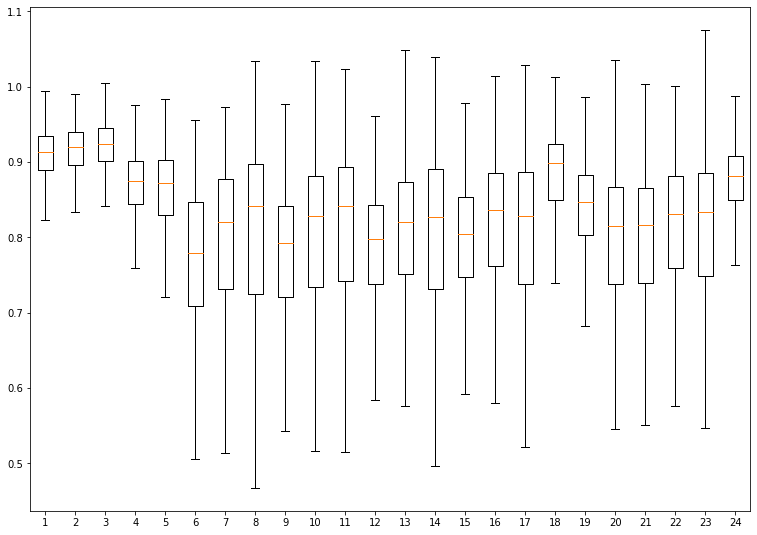

In [74]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
ax=fig.add_axes([0, 0, 1, 1])
bp=ax.boxplot(bx_whs,showfliers=False)